<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        MACHINE LEARNING HOMEWORK
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> ML Exam session 10/06/2024</b> <br>
    <b> Homework done by:<br>
    Arianna Rigamonti - 252321 <br>
    Jacopo Libero Tettamanti - 252329
    </div>
    </td>
    <td width="100px">
        </a>
    </td>
</tr>
</table>

# **LOAD DATA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Remove extra spaces from column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

In [3]:
# Inspect train set
train_df.head()

Kingdom  DNAtype  SpeciesID  Ncodons  \
0    872  vrl             0     207343     6686   
1   9865  inv             0       7629    10060   
2   3190  bct             0     320850    14031   
3   3674  bct             0       1397    39839   
4  11372  vrt             1      50790     5112   

                                         SpeciesName      UUU      UUC  \
0  Bovine foamy virus                            ...  0.01541  0.00927   
1  Anthocidaris crassispina                      ...  0.01213  0.02515   
2  Staphylococcus phage X2                       ...  0.02580  0.01618   
3  Bacillus circulans                            ...  0.00128  0.02141   
4  mitochondrion Dascyllus trimaculatus          ...  0.03169  0.01780   

       UUA      UUG  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.01720  0.01825  ...  0.00643  0.02064  0.01182  0.02812  0.00838   
1  0.00268  0.01352  ...  0.00268  0.00915  0.01412  0.03280  0.02555   
2  0.03606  0.01354  ...  0.00114  0.01775  0.00499  0.03756  0.02523   
3  0.01225  0.01649  ...  0.01177  0.00705  0.00422  0.03316  0.02229   
4  0.03893  0.00000  ...  0.00000  0.00000  0.00000  0.00020  0.01389   

       GAA      GAG      UAA      UAG      UGA  
0  0.03365  0.01974  0.01511  0.00030  0.00030  
1  0.03708  0.05398  0.03330  0.00030  0.00050  
2  0.05388  0.01946  0.02245  0.00121  0.00086  
3  0.03444  0.02370  0.00831  0.00028  0.00063  
4  0.02465  0.00352  0.00352  0.00000  0.02465  

[5 rows x 70 columns]

In [4]:
# Inspect test set
test_df.head()

Kingdom  DNAtype  SpeciesID  Ncodons  \
0  5114  bct             0     360105   568103   
1  8747  inv             0     135724     6295   
2  6220  pln             0     120297     3451   
3  6144  pln             0     105351    14867   
4  6783  pln             2     280810     1143   

                                         SpeciesName      UUU      UUC  \
0  Campylobacter curvus 525.92                   ...  0.00959  0.01359   
1  Pimpla hypochondriaca                         ...  0.01223  0.03447   
2  Fusarium oxysporum f. sp. niveum              ...  0.01014  0.03014   
3  Aspergillus awamori                           ...  0.03551  0.02892   
4  chloroplast Cryptothallus mirabilis           ...  0.01662  0.01400   

       UUA      UUG  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01584  0.01312  ...  0.00354  0.00121  0.00709  0.02980  0.04135   
1  0.00508  0.01811  ...  0.00763  0.00524  0.01001  0.02621  0.03368   
2  0.00145  0.01275  ...  0.00551  0.00058  0.00174  0.02753  0.02695   
3  0.00155  0.01117  ...  0.00303  0.00451  0.00356  0.02865  0.02401   
4  0.02800  0.03412  ...  0.01662  0.00175  0.01837  0.03062  0.02362   

       GAA      GAG      UAA      UAG      UGA  
0  0.02608  0.03877  0.01183  0.00061  0.00117  
1  0.02303  0.03066  0.03479  0.00064  0.00064  
2  0.00637  0.01826  0.03216  0.00116  0.00029  
3  0.01594  0.03390  0.01628  0.00108  0.00047  
4  0.03150  0.01575  0.02625  0.00087  0.00525  

[5 rows x 69 columns]

# **SAMPLE DISTRIBUTION**

**Kingdoms distribution in train and test set**

In [5]:
# Combine train and test dataframes, adding a new column to distinguish them
combined_df = pd.concat([train_df.assign(Dataset='Train'), test_df.assign(Dataset='Test')])

# Create the FacetGrid with two subplots (one for each dataset)
g = sns.FacetGrid(combined_df, col='Dataset', height=5)

# Map the countplot to each subplot
g.map(sns.countplot, 'Kingdom', palette='tab10', order=combined_df['Kingdom'].unique())

# Add titles and rotate x labels for readability
g.set_titles(col_template='{col_name} Dataset')
g.set_xticklabels(rotation=90)

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


**DNAtype distribution in train and test set**

In [6]:
# Create the FacetGrid with two subplots (one for each dataset)
g = sns.FacetGrid(combined_df, col='Dataset', height=5)

# Map the countplot to each subplot
g.map(sns.countplot, 'DNAtype', palette='tab10', order=combined_df['DNAtype'].unique())

# Add titles and rotate x labels for readability
g.set_titles(col_template='{col_name} Dataset')
g.set_xticklabels(rotation=90)

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


**Ncodons distribution in train and test set**

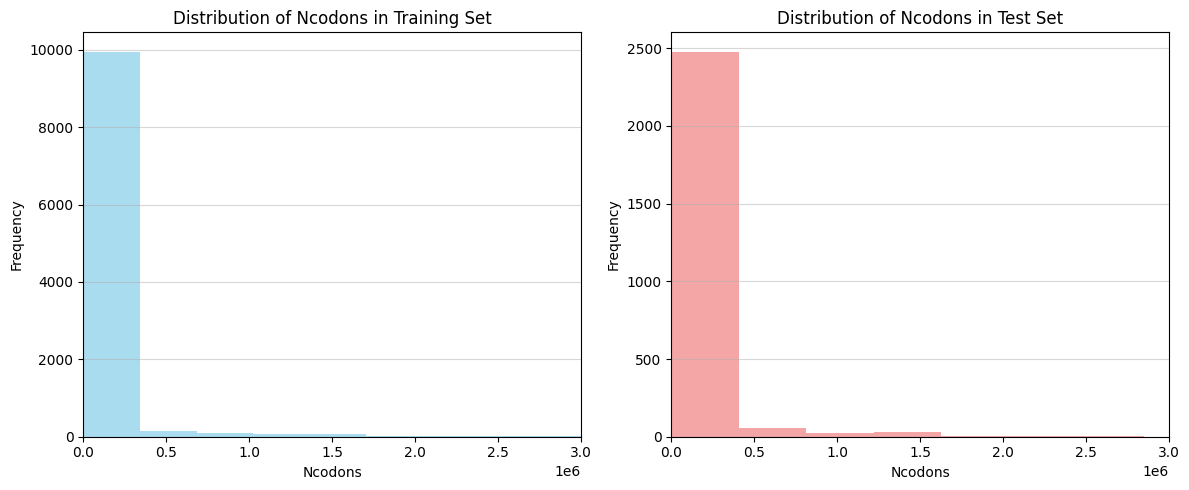

In [7]:
plt.figure(figsize=(12, 5))

# Plot for training set
plt.subplot(1, 2, 1)
plt.hist(train_df['Ncodons'], bins=100, color='skyblue', alpha=0.7)
plt.title('Distribution of Ncodons in Training Set')
plt.xlabel('Ncodons')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.xlim(0, 3000000)

# Plot for test set
plt.subplot(1, 2, 2)
plt.hist(test_df['Ncodons'], bins=100, color='lightcoral', alpha=0.7)
plt.title('Distribution of Ncodons in Test Set')
plt.xlabel('Ncodons')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.xlim(0, 3000000)

plt.tight_layout()
plt.show()

As we can see, Ncodons doesn't seem to have a high variability among the dataset.

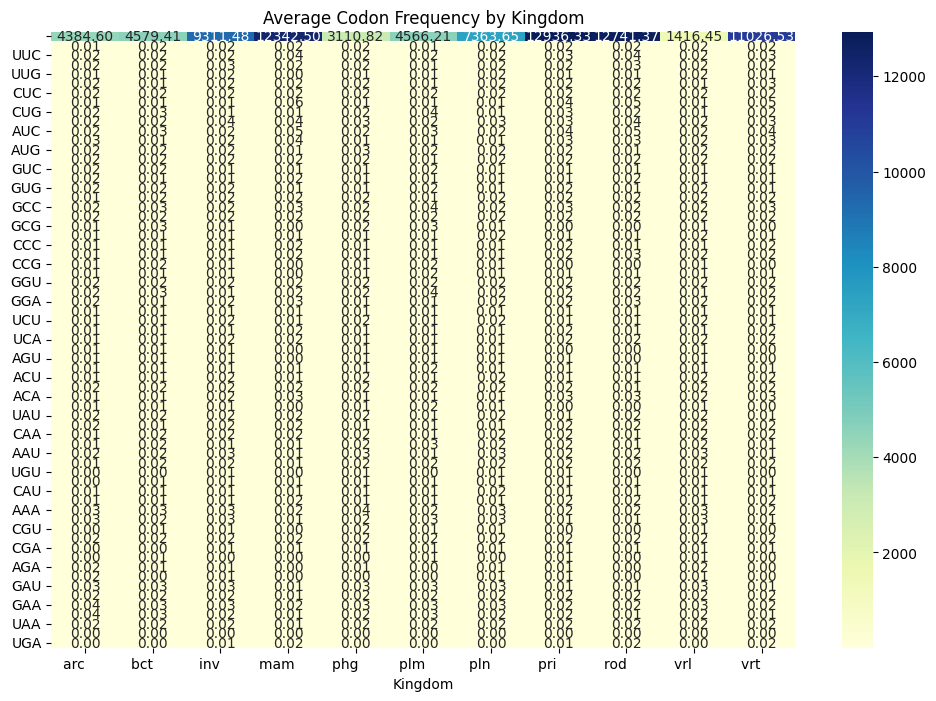

In [8]:
# Average codon frequency per kingdom
codon_means = train_df.drop(columns=['DNAtype','SpeciesID', 'Ncodons',	'SpeciesName']).groupby('Kingdom').mean().reset_index()

# Convert to "long" format for seaborn
codon_means_long = pd.melt(codon_means, id_vars='Kingdom', var_name='Codon', value_name='Frequency')

plt.figure(figsize=(12, 8))
sns.heatmap(codon_means.set_index('Kingdom').T, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Codon Frequency by Kingdom')
plt.show()

# **DATA PRE-PROCESSING**

In [9]:
# Remove columns: DNAtype, SpeciesID,	Ncodons,	SpeciesName
columns_to_remove = ['DNAtype',	'SpeciesID', 'Ncodons',	'SpeciesName']
train_df2 = train_df.drop(columns_to_remove, axis = 1)
test_df2 = test_df.drop(columns_to_remove, axis = 1)

In [10]:
# Check if there are na values
nan_values = train_df2.isna().sum().sum()
print(f"Nan values: {nan_values}") # no na values.
print(f"Train set shape: {train_df2.shape}")
print(f"Test set shape: {test_df2.shape}")
# test and train set features differ for AGA column (present in train but not in test set)

Nan values: 0
Train set shape: (10422, 66)
Test set shape: (2606, 65)


In [11]:
# Inspect train set
train_df2.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0    872  vrl       0.01541  0.00927  0.01720  0.01825  0.01436  0.02303   
1   9865  inv       0.01213  0.02515  0.00268  0.01352  0.01372  0.01143   
2   3190  bct       0.02580  0.01618  0.03606  0.01354  0.00848  0.02067   
3   3674  bct       0.00128  0.02141  0.01225  0.01649  0.01330  0.01308   
4  11372  vrt       0.03169  0.01780  0.03893  0.00000  0.06240  0.01056   

       CUA      CUG  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.01555  0.02094  ...  0.00643  0.02064  0.01182  0.02812  0.00838   
1  0.00775  0.02992  ...  0.00268  0.00915  0.01412  0.03280  0.02555   
2  0.01041  0.00278  ...  0.00114  0.01775  0.00499  0.03756  0.02523   
3  0.00399  0.02834  ...  0.01177  0.00705  0.00422  0.03316  0.02229   
4  0.05262  0.01408  ...  0.00000  0.00000  0.00000  0.00020  0.01389   

       GAA      GAG      UAA      UAG      UGA  
0  0.03365  0.01974  0.01511  0.00030  0.00030  
1  0.03708  0.05398  0.03330  0.00030  0.00050  
2  0.05388  0.01946  0.02245  0.00121  0.00086  
3  0.03444  0.02370  0.00831  0.00028  0.00063  
4  0.02465  0.00352  0.00352  0.00000  0.02465  

[5 rows x 66 columns]

In [12]:
# Inspect test set
test_df2.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0  5114  bct       0.00959  0.01359  0.01584  0.01312  0.02491  0.02457   
1  8747  inv       0.01223  0.03447  0.00508  0.01811  0.01176  0.02335   
2  6220  pln       0.01014  0.03014  0.00145  0.01275  0.01420  0.02521   
3  6144  pln       0.03551  0.02892  0.00155  0.01117  0.01224  0.02475   
4  6783  pln       0.01662  0.01400  0.02800  0.03412  0.01312  0.02625   

       CUA      CUG  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01885  0.01269  ...  0.00354  0.00121  0.00709  0.02980  0.04135   
1  0.00413  0.02017  ...  0.00763  0.00524  0.01001  0.02621  0.03368   
2  0.00261  0.01101  ...  0.00551  0.00058  0.00174  0.02753  0.02695   
3  0.00511  0.02233  ...  0.00303  0.00451  0.00356  0.02865  0.02401   
4  0.02100  0.01137  ...  0.01662  0.00175  0.01837  0.03062  0.02362   

       GAA      GAG      UAA      UAG      UGA  
0  0.02608  0.03877  0.01183  0.00061  0.00117  
1  0.02303  0.03066  0.03479  0.00064  0.00064  
2  0.00637  0.01826  0.03216  0.00116  0.00029  
3  0.01594  0.03390  0.01628  0.00108  0.00047  
4  0.03150  0.01575  0.02625  0.00087  0.00525  

[5 rows x 65 columns]

# **DATA VISUALIZATION**

**CORRELATION MATRIX**

The following code generates a heatmap to visualize the correlations between different codon frequencies within our dataset. By looking at how often different codon combinations show up together we can start to see interesting patterns in how the genetic code is put together and used.

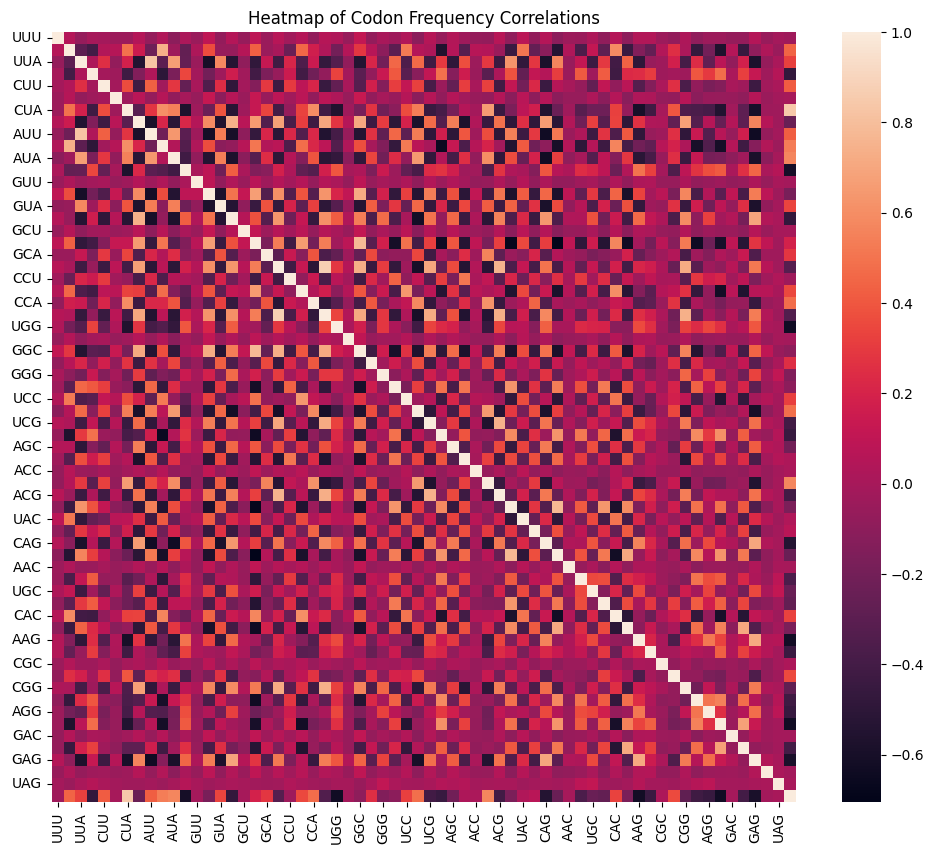

In [13]:
# Compute correlation matrix using all codons frequencies
corr_matrix = train_df2.iloc[:, 2:].corr()

# Creation of the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix)
plt.title('Heatmap of Codon Frequency Correlations')
plt.show()

**Subset correlation matrix**

We now take a look at the strongest relationships in our data. We're filtering the correlation matrix to highlight only the really strong positive connections (above 0.7) or the moderately negative ones (below -0.4).

To make sure we're not missing anything important, we'll count how many of these strong relationships each codon has. We'll focus our attention on the codons that seem to be involved in multiple strong relationships, as these are the ones most likely to be part of interesting patterns.

To keep things tidy, we'll get rid of any self-correlations (which are just a codon being compared to itself) and any redundant information (since the relationship between codon A and codon B is the same as the relationship between codon B and codon A).

Finally, we'll create a new heatmap to visualize the filtered data. This gives us a clearer picture of the most important connections between the codons.

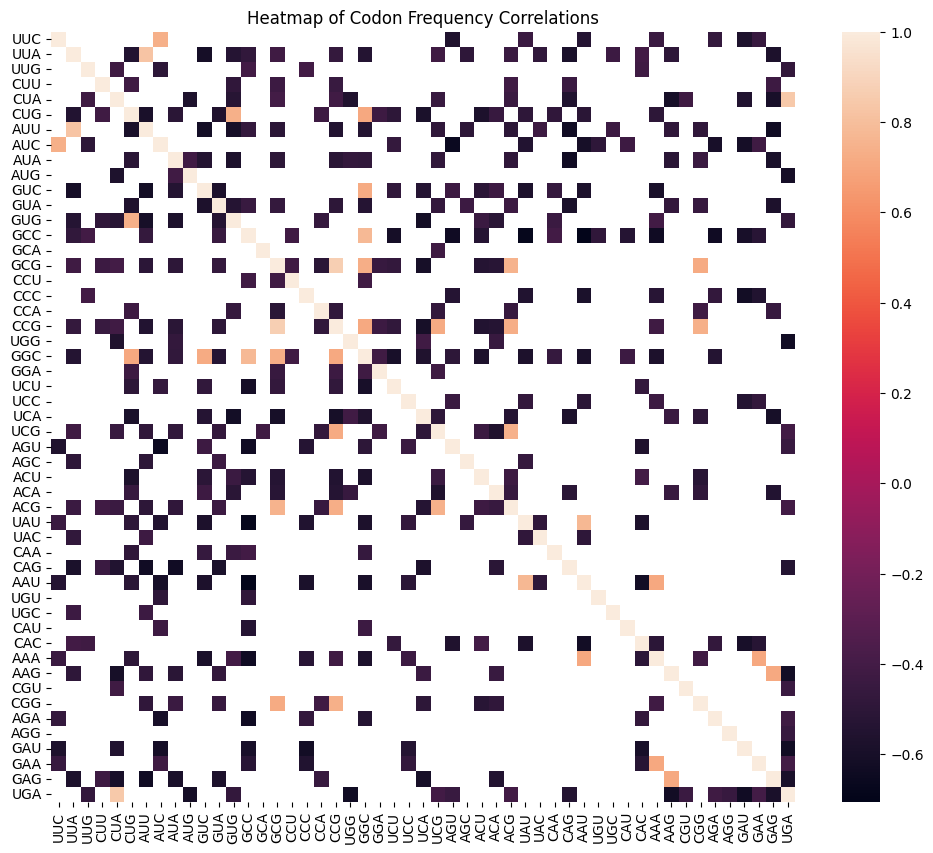

In [14]:
# Filter based on correlation strength thresholds
corr_max = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.4)]

# Add a column counting the number of significant correlations per codon
corr_max["count"] = corr_max.count(axis = 1)

# Keep only codons with more than one significant correlation
corr_max2 = corr_max[corr_max["count"] > 1]

# Remove self-correlations (diagonal of the matrix) and redundant entries
corr_max3 = corr_max2.drop(corr_max2.columns[~corr_max2.columns.isin(corr_max2.index)], axis = 1)

# Creation of the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_max3)
plt.title('Heatmap of Codon Frequency Correlations')
plt.show()

**DIMENSIONALITY REDUCTION: PCA**

Now we transform and visualize our data: we simplify genetic patterns with PCA and plot how different organisms group together based on their genetic information.

In [15]:
train_df3 = train_df2.copy()
test_df3 = test_df2.copy()

# Transform the "Kingdom" category into numbers for easier analysis
train_df3['Kingdom_code'] = pd.Categorical(train_df2['Kingdom']).codes.astype('int')

# Transform the "Kingdom" category into numbers for easier analysis
test_df3['Kingdom_code'] = pd.Categorical(test_df2['Kingdom']).codes.astype('int')

In [16]:
train_df3.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0    872  vrl       0.01541  0.00927  0.01720  0.01825  0.01436  0.02303   
1   9865  inv       0.01213  0.02515  0.00268  0.01352  0.01372  0.01143   
2   3190  bct       0.02580  0.01618  0.03606  0.01354  0.00848  0.02067   
3   3674  bct       0.00128  0.02141  0.01225  0.01649  0.01330  0.01308   
4  11372  vrt       0.03169  0.01780  0.03893  0.00000  0.06240  0.01056   

       CUA      CUG  ...      AGA      AGG      GAU      GAC      GAA  \
0  0.01555  0.02094  ...  0.02064  0.01182  0.02812  0.00838  0.03365   
1  0.00775  0.02992  ...  0.00915  0.01412  0.03280  0.02555  0.03708   
2  0.01041  0.00278  ...  0.01775  0.00499  0.03756  0.02523  0.05388   
3  0.00399  0.02834  ...  0.00705  0.00422  0.03316  0.02229  0.03444   
4  0.05262  0.01408  ...  0.00000  0.00000  0.00020  0.01389  0.02465   

       GAG      UAA      UAG      UGA  Kingdom_code  
0  0.01974  0.01511  0.00030  0.00030             9  
1  0.05398  0.03330  0.00030  0.00050             2  
2  0.01946  0.02245  0.00121  0.00086             1  
3  0.02370  0.00831  0.00028  0.00063             1  
4  0.00352  0.00352  0.00000  0.02465            10  

[5 rows x 67 columns]

In [17]:
test_df3.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0  5114  bct       0.00959  0.01359  0.01584  0.01312  0.02491  0.02457   
1  8747  inv       0.01223  0.03447  0.00508  0.01811  0.01176  0.02335   
2  6220  pln       0.01014  0.03014  0.00145  0.01275  0.01420  0.02521   
3  6144  pln       0.03551  0.02892  0.00155  0.01117  0.01224  0.02475   
4  6783  pln       0.01662  0.01400  0.02800  0.03412  0.01312  0.02625   

       CUA      CUG  ...      CGG      AGG      GAU      GAC      GAA  \
0  0.01885  0.01269  ...  0.00121  0.00709  0.02980  0.04135  0.02608   
1  0.00413  0.02017  ...  0.00524  0.01001  0.02621  0.03368  0.02303   
2  0.00261  0.01101  ...  0.00058  0.00174  0.02753  0.02695  0.00637   
3  0.00511  0.02233  ...  0.00451  0.00356  0.02865  0.02401  0.01594   
4  0.02100  0.01137  ...  0.00175  0.01837  0.03062  0.02362  0.03150   

       GAG      UAA      UAG      UGA  Kingdom_code  
0  0.03877  0.01183  0.00061  0.00117             1  
1  0.03066  0.03479  0.00064  0.00064             2  
2  0.01826  0.03216  0.00116  0.00029             6  
3  0.03390  0.01628  0.00108  0.00047             6  
4  0.01575  0.02625  0.00087  0.00525             6  

[5 rows x 66 columns]

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # scale data: mean 0 and variance 1
scaled_features = scaler.fit_transform(train_df3.iloc[:, 2:-1]) # select only codon frequencies

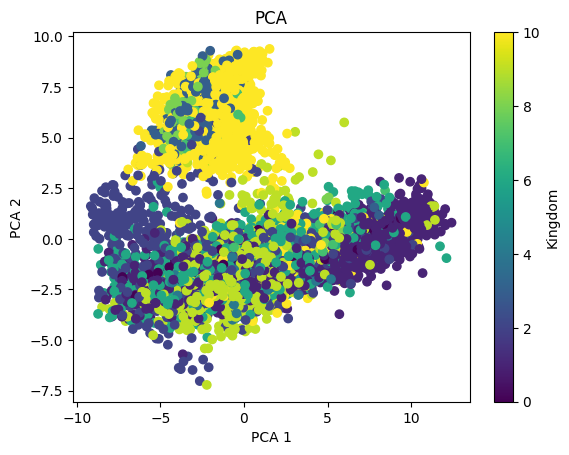

In [19]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dataset's dimensions to two main components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a scatter plot of the PCA results, coloring points by Kingdom
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_df3['Kingdom_code'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA')
plt.colorbar(label='Kingdom')
plt.show()

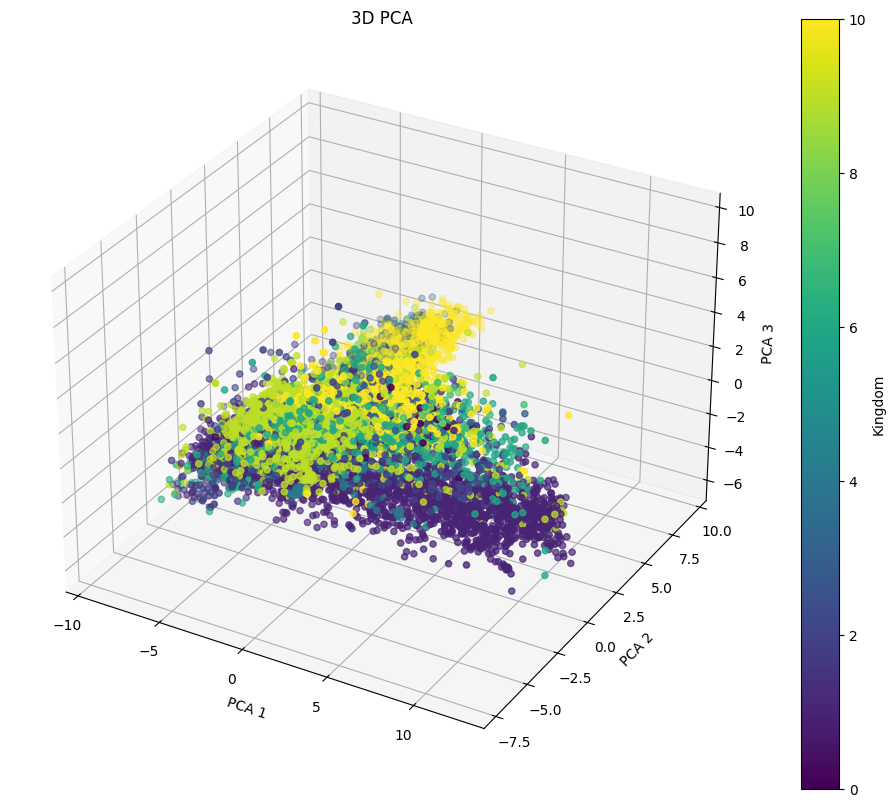

In [20]:
# Let's now apply PCA in 3 dimensions

from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce the dataset's dimensions to three main components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_features)

# Create a scatter plot of the PCA results, coloring points by Kingdom
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=train_df3['Kingdom_code'], cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title('3D PCA')
fig.colorbar(img, label='Kingdom')
plt.show()

**VISUALIZATION: T-SNE AND UMAP**

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** is a non-linear dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space, typically two or three dimensions. It aims to preserve the local structure of the data, meaning points that are close to each other in the original high-dimensional space will remain close in the lower-dimensional representation. This allows us to visually identify clusters and patterns that might not be apparent in the original data.

**UMAP (Uniform Manifold Approximation and Projection)** is another non-linear dimensionality reduction technique that seeks to preserve the global structure of high-dimensional data while projecting it into a lower-dimensional space. It achieves this by constructing a weighted graph representing the high-dimensional data manifold, where nodes represent data points and edges indicate similarity. The algorithm then optimizes a lower-dimensional embedding by minimizing the cross-entropy between the high-dimensional and low-dimensional graph structures.

*Key Differences between T-SNE and UMAP*:

- **Global vs. Local Structure**: UMAP prioritizes preserving the global structure of the data, including the relative distances between clusters, while t-SNE focuses on preserving local pairwise distances within clusters.
-**Optimization Function**: UMAP minimizes cross-entropy between graph structures, while t-SNE minimizes Kullback-Leibler divergence between probability distributions.
- **Interpretability**: UMAP's fuzzy simplicial set representation provides a more interpretable framework for understanding the relationships between data points compared to t-SNE's probabilistic approach.
- **Speed and Scalability**: UMAP is generally faster and can handle larger datasets more efficiently than t-SNE.

T-SNE with perplexity tuning and coloring based on Kingdom

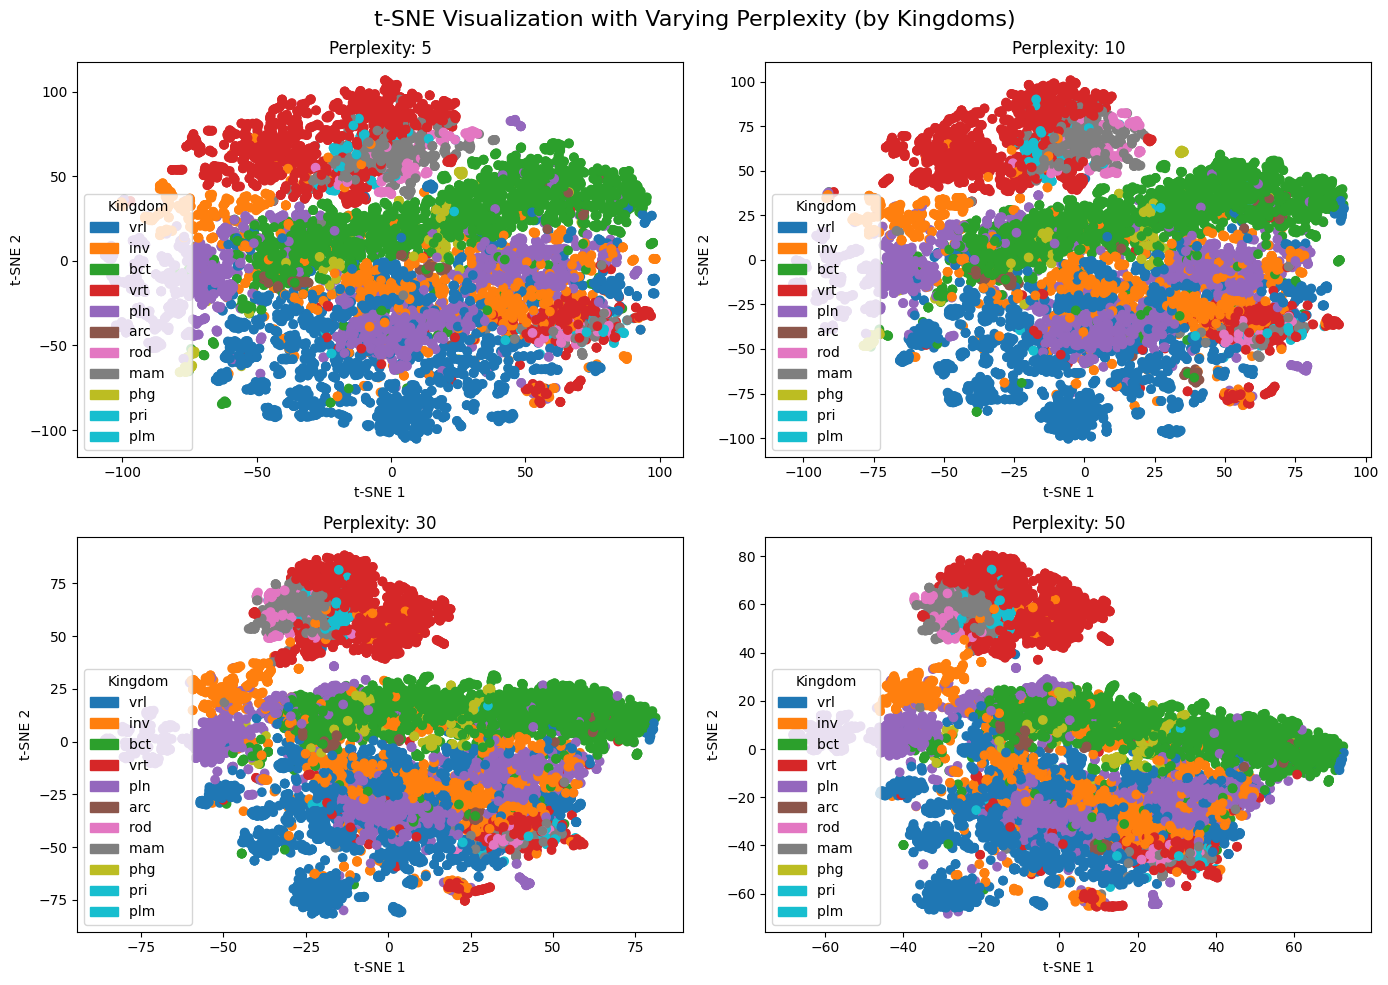

In [21]:
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE

# Perplexity = hyperparameter that balances local and global aspects of the data structure. It can be adjusted based on the dataset --> We can try different perplexity values:

perplexities = [5, 10, 30, 50]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Get unique kingdom codes and their corresponding colors
kingdom_codes = train_df3['Kingdom'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(kingdom_codes)))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(scaled_features)

    row = i // 2
    col = i % 2

    scatter = axes[row, col].scatter(tsne_result[:, 0], tsne_result[:, 1], c=pd.factorize(train_df3['Kingdom'])[0], cmap='tab10')

    # Create custom legend 
    legend_handles = [mpatches.Patch(color=colors[i], label=kingdom_codes[i]) for i in range(len(kingdom_codes))]

    axes[row, col].legend(handles=legend_handles, title="Kingdom", loc="lower left")

    axes[row, col].set_xlabel('t-SNE 1')
    axes[row, col].set_ylabel('t-SNE 2')
    axes[row, col].set_title(f'Perplexity: {perplexity}')

plt.suptitle('t-SNE Visualization with Varying Perplexity (by Kingdoms)', fontsize=16)
plt.tight_layout()
plt.show()


UMAP with parameters tuning and coloring based on Kingdom

In [22]:
#!pip install umap-learn
import umap.umap_ as umap

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


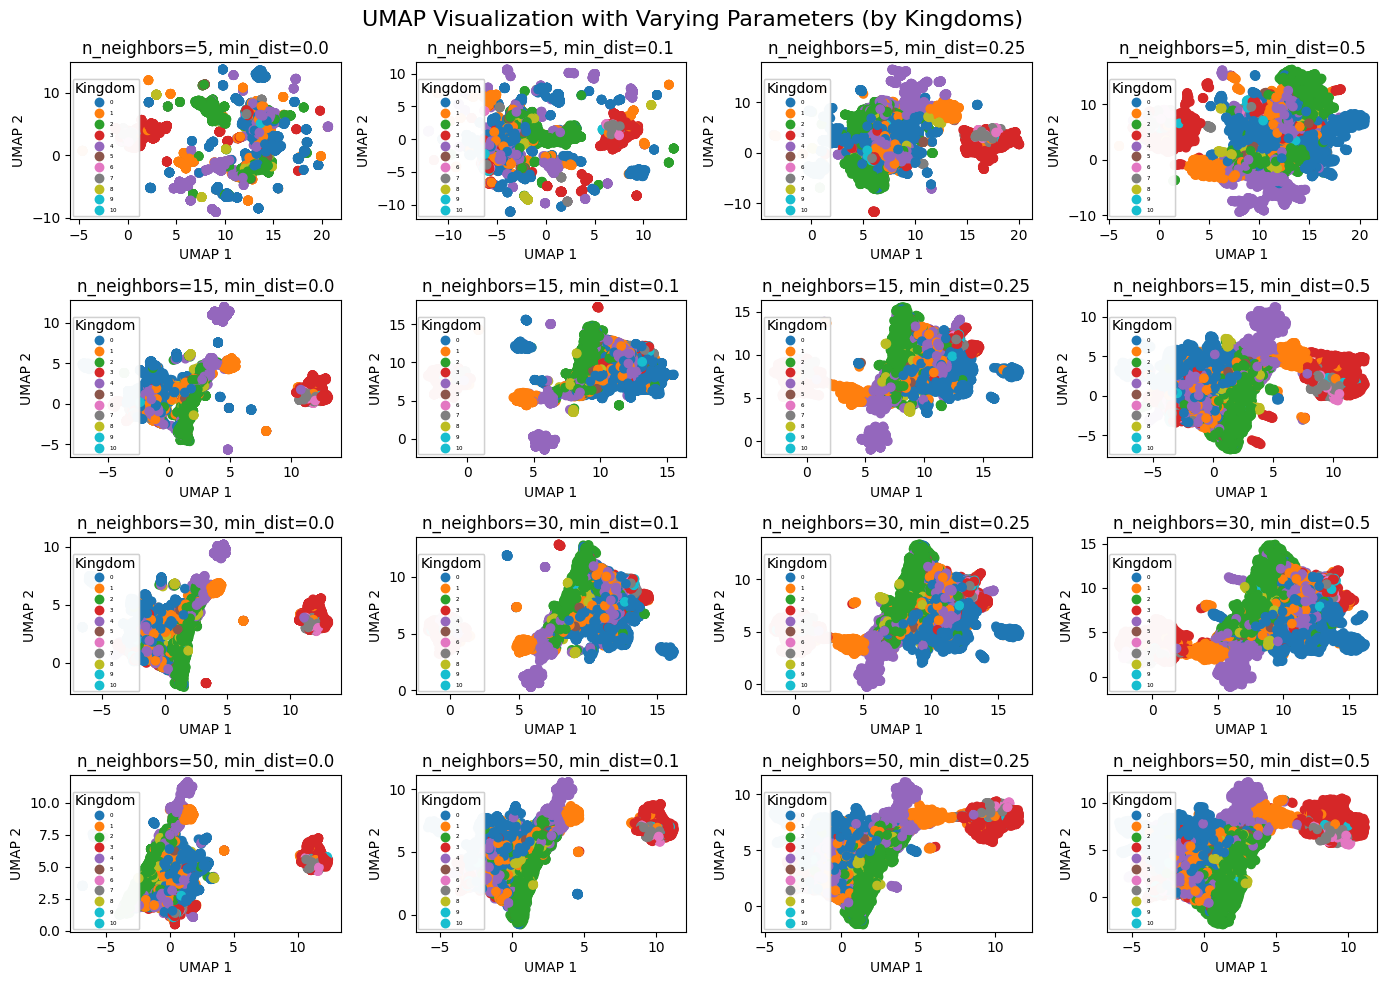

In [23]:
n_neighbors_values = [5, 15, 30, 50]
min_dist_values = [0.0, 0.1, 0.25, 0.5]

fig, axes = plt.subplots(len(n_neighbors_values), len(min_dist_values), figsize=(14, 10))  # Create a grid of subplots

# Iterate over parameter combinations
for i, n_neighbors in enumerate(n_neighbors_values):
    for j, min_dist in enumerate(min_dist_values):
        # Create a UMAP reducer with current parameters
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist)
        embedding = reducer.fit_transform(scaled_features)

        # Scatter plot on the correct subplot
        scatter = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], c=pd.factorize(train_df3['Kingdom'])[0], cmap='tab10')

        # Adding legend
        legend1 = axes[i, j].legend(*scatter.legend_elements(),
                                   loc="lower left", title="Kingdom", fontsize=4)
        axes[i, j].add_artist(legend1)

        # Set title and labels for each subplot
        axes[i, j].set_xlabel('UMAP 1')
        axes[i, j].set_ylabel('UMAP 2')
        axes[i, j].set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist}')

# Add a main title to the entire figure
plt.suptitle('UMAP Visualization with Varying Parameters (by Kingdoms)', fontsize=16)
plt.tight_layout()
plt.show()


# **CLUSTERING**

We will perform:

1. Hierarchical Clustering: Bottom-up and Top-down
2. Partitioning Clustering: K-means and PAM
3. Density-based clustering: DBSCAN
4. Probability-Based Clustering: Gaussian Mixture Models

In [24]:
from sklearn.cluster import AgglomerativeClustering, KMeans
#!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
#!pip install kneed
from kneed import KneeLocator # For automatic elbow point detection. Note: with Python 3.10 or later, you'll likely need to install 'setuptools' to use KneeLocator: pip install setuptools
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

**1. Hierarchical Clustering: Bottom-up and Top-down**

In [25]:
def hierarchical_clustering(X, linkage_methods=['ward', 'complete', 'average', 'single']):
    for method in linkage_methods:
        # Set a reasonable distance threshold to ensure multiple clusters
        distance_threshold = 0.5 * np.max(linkage(X, method=method)[:, 2])
        agg = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage=method)
        agg.fit(X)

        # Dendrogram (Bottom-up) - Sample for single linkage
        # Single linkage is prone to creating long chains of clusters due to its focus on the minimum distance between points.
        # This can make the dendrogram extremely complex and lead to recursion errors for larger datasets like ours.

        plt.figure(figsize=(10, 7))
        if method == 'single' and X.shape[0] > 1000:
            sample_indices = np.random.choice(X.shape[0], 1000, replace=False)
            X_sample = X[sample_indices]
            dendrogram(linkage(X_sample, method=method), truncate_mode='lastp', p=100)
            plt.title(f'Dendrogram ({method.capitalize()} Linkage) - Sample of 1000 points')

        else:
            dendrogram(linkage(X, method=method))
            plt.title(f'Dendrogram ({method.capitalize()} Linkage)')

        plt.xlabel('Data points')
        plt.ylabel('Distance')
        plt.axhline(y=distance_threshold, color='r', linestyle='--')
        plt.show()

        # Check number of clusters, then evaluate
        n_clusters = len(np.unique(agg.labels_))
        print(f"\nHierarchical Clustering ({method.capitalize()} Linkage):")
        print(f"  Number of clusters found: {n_clusters}")
        if n_clusters > 1:
            print(f"  Silhouette Score: {silhouette_score(X, agg.labels_):.3f}")
        else:
            print("  Not enough clusters for Silhouette calculation.")


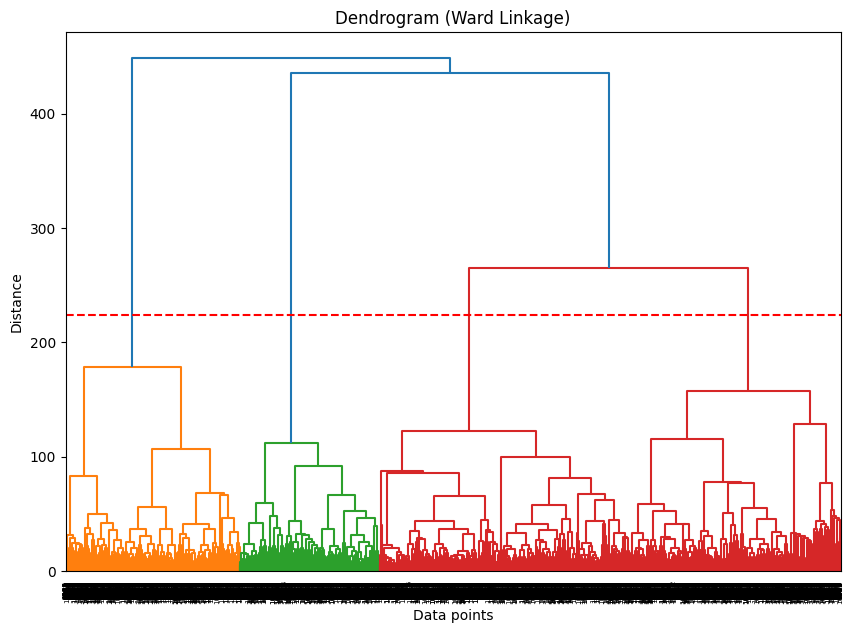


Hierarchical Clustering (Ward Linkage):
  Number of clusters found: 4
  Silhouette Score: 0.135


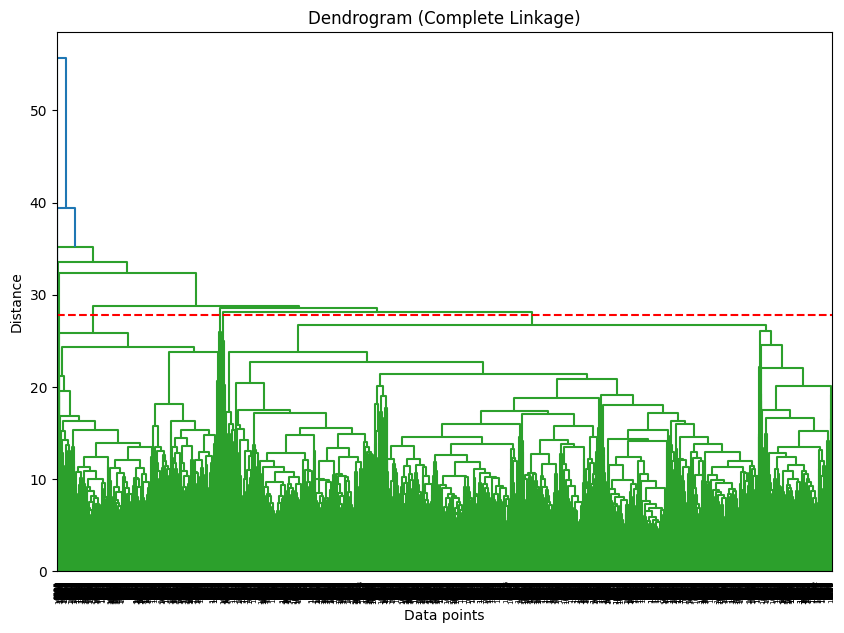


Hierarchical Clustering (Complete Linkage):
  Number of clusters found: 9
  Silhouette Score: 0.172


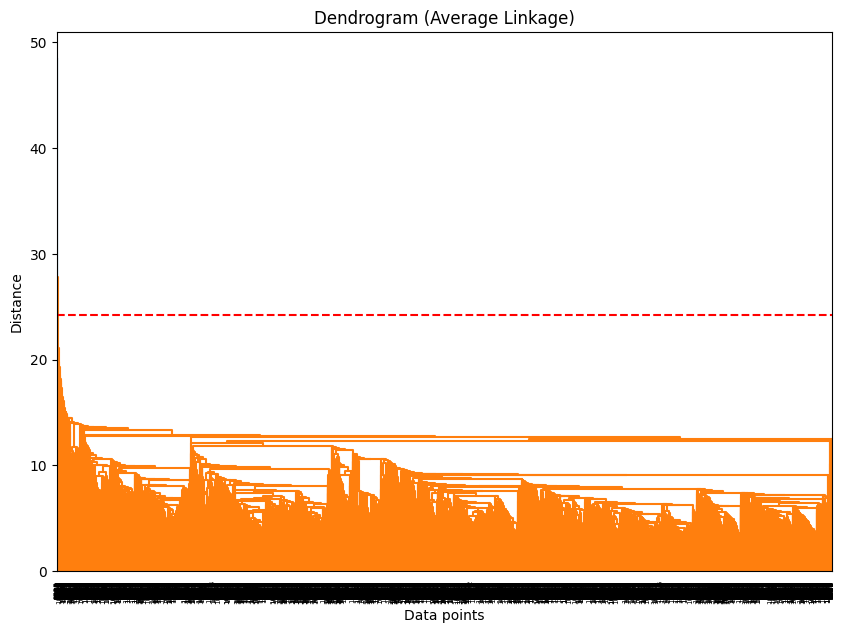


Hierarchical Clustering (Average Linkage):
  Number of clusters found: 4
  Silhouette Score: 0.573


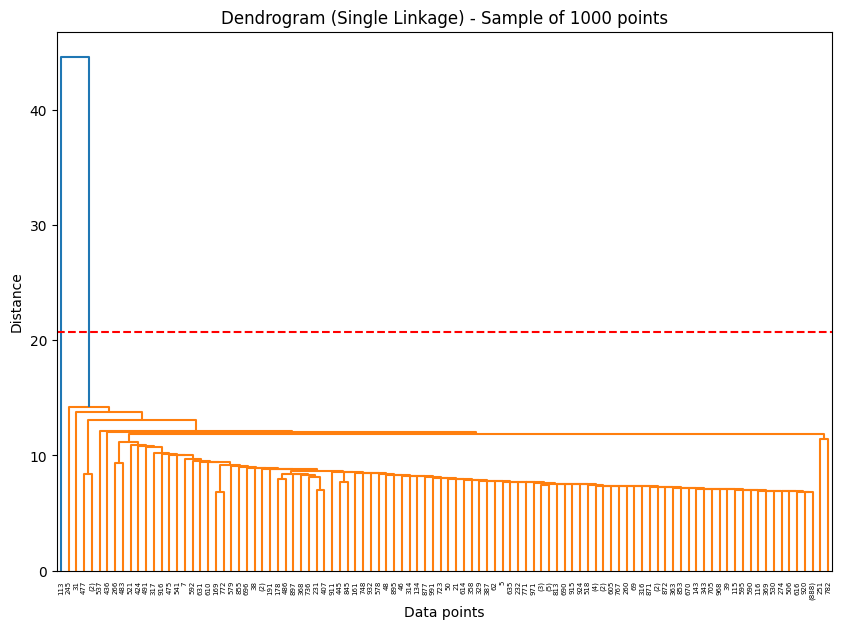


Hierarchical Clustering (Single Linkage):
  Number of clusters found: 2
  Silhouette Score: 0.777


In [26]:
# use the function
hierarchical_clustering(scaled_features)

**2. Partitioning Clustering: K-means and PAM**

In [27]:
def find_optimal_k_kmeans(X, max_clusters=15):
    """Finds optimal k for K-means using Silhouette and Elbow methods."""
    sse = []
    silhouettes = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X, kmeans.labels_))

    # Combined Plot for K-means
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Elbow Plot (ax1)
    color = 'tab:blue'
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia', color=color)
    ax1.plot(range(2, max_clusters + 1), sse, marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    kl = KneeLocator(range(2, max_clusters + 1), sse, curve='convex', direction='decreasing')
    elbow_k = kl.elbow if kl.elbow else None
    if elbow_k:
        ax1.scatter(elbow_k, sse[elbow_k - 2], marker='x', s=100, color='red', label=f'Elbow (k={elbow_k})')

    # Silhouette Plot (ax2)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Silhouette Score', color=color)
    ax2.plot(range(2, max_clusters + 1), silhouettes, marker='o', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    silhouette_k = silhouettes.index(max(silhouettes)) + 2
    ax2.scatter(silhouette_k, silhouettes[silhouette_k - 2], marker='x', s=100, color='green', label=f'Silhouette (k={silhouette_k})')

    # Title and Legend
    plt.title('Elbow and Silhouette Analysis for K-means')
    fig.legend(loc="upper right")
    plt.show()

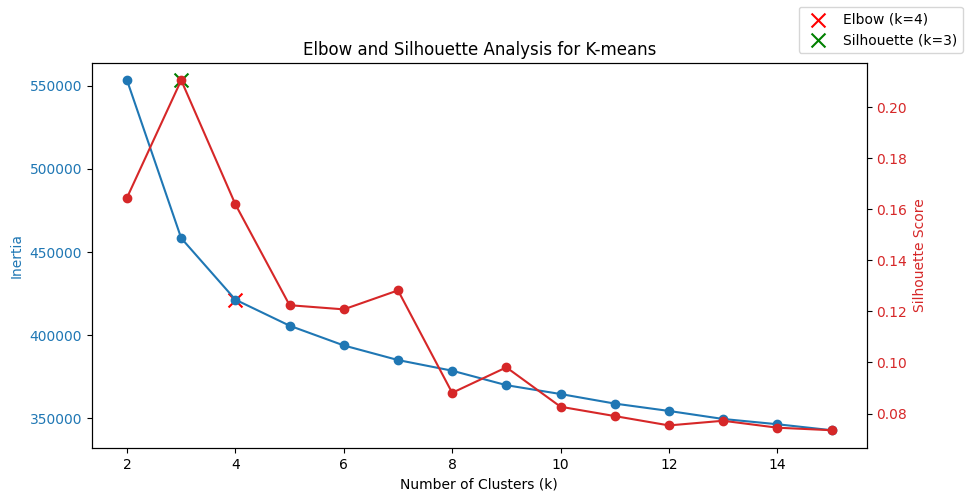

In [28]:
# Use find_optimal_k_kmeans function
find_optimal_k_kmeans(scaled_features)

In [29]:
def find_optimal_k_pam(X, max_clusters=15):
    """Finds optimal k for PAM using the Silhouette method."""
    silhouettes = []
    for k in range(2, max_clusters + 1):
        pam = KMedoids(n_clusters=k, random_state=42)
        pam_labels = pam.fit_predict(X)
        silhouettes.append(silhouette_score(X, pam_labels))

    # Silhouette Plot for PAM
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters + 1), silhouettes, marker='o')
    plt.title('Silhouette Method for Optimal k (PAM)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    silhouette_k = silhouettes.index(max(silhouettes)) + 2
    plt.scatter(silhouette_k, silhouettes[silhouette_k - 2], marker='x', s=100, color='red', label=f'Optimal k (Silhouette)={silhouette_k}')
    plt.legend()
    plt.show()

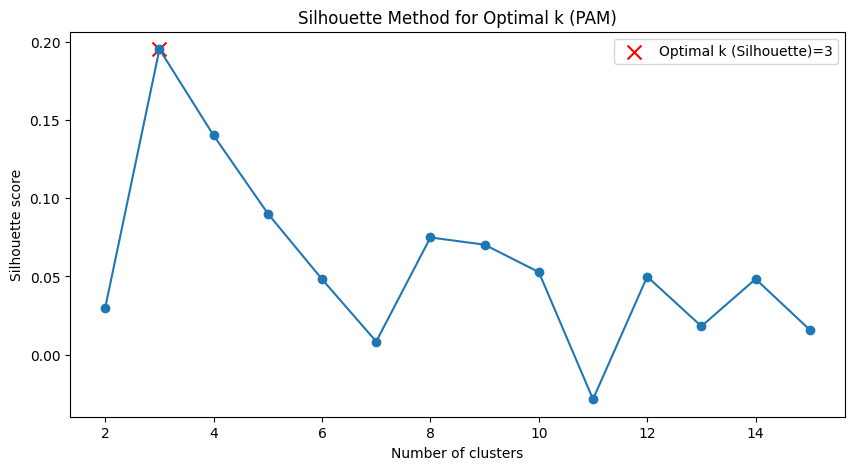

In [30]:
# Use find_optimal_k_pam function
find_optimal_k_pam(scaled_features)

In [39]:
def Kmeans_clustering(X):
    """Performs K-means clustering and evaluates the results."""
    elbow_k, silhouette_k, n_kingdoms = 3, 4, 11  # From elbow and silhouette plots + number of kingdoms (11)

    for k in [elbow_k, silhouette_k, n_kingdoms]:
        if k is None:  # Skip if optimal k is not found
            continue

        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_labels = kmeans.fit_predict(X)

        # Visualization with PCA for better interpretability
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
        plt.title(f'K-means Clustering (k={k})')

        plt.show()

        # Evaluation
        print(f"\nClustering Results (k={k}):")
        print(f"  K-means Silhouette Score: {silhouette_score(X, kmeans_labels):.3f}")

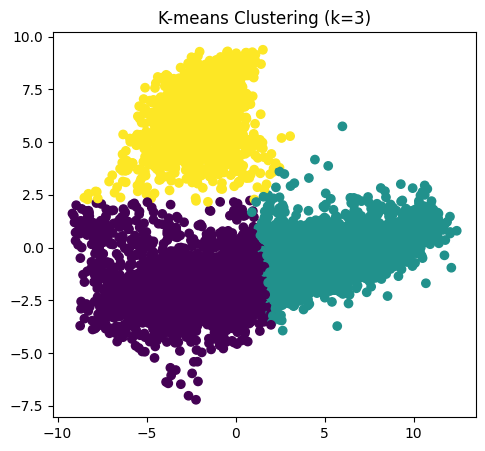


Clustering Results (k=3):
  K-means Silhouette Score: 0.210



Clustering Results (k=4):
  K-means Silhouette Score: 0.162



Clustering Results (k=11):
  K-means Silhouette Score: 0.079


In [40]:
# Use Kmeans_clustering function
Kmeans_clustering(scaled_features)

In [42]:
def PAM_clustering(X):
    """Performs PAM clustering with a fixed k and evaluates the results."""

    ks = [3, 11] # From silhouette plot + number of Kingdoms (11)

    for k in ks: 
        
        pam = KMedoids(n_clusters=k, random_state=42)
        pam_labels = pam.fit_predict(X)

        silhouette_avg = silhouette_score(X, pam_labels)

        # Visualize with PCA for better interpretability
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        plt.figure(figsize=(10, 5))

        # Scatter Plot of PAM results
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pam_labels, cmap='viridis', s=50)
        plt.title(f'PAM Clustering (k={k})')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

        # Evaluation
        print(f"\nClustering Results (k={k}):")
        print(f"  PAM Silhouette Score: {silhouette_avg:.3f}")


Clustering Results (k=3):
  PAM Silhouette Score: 0.195


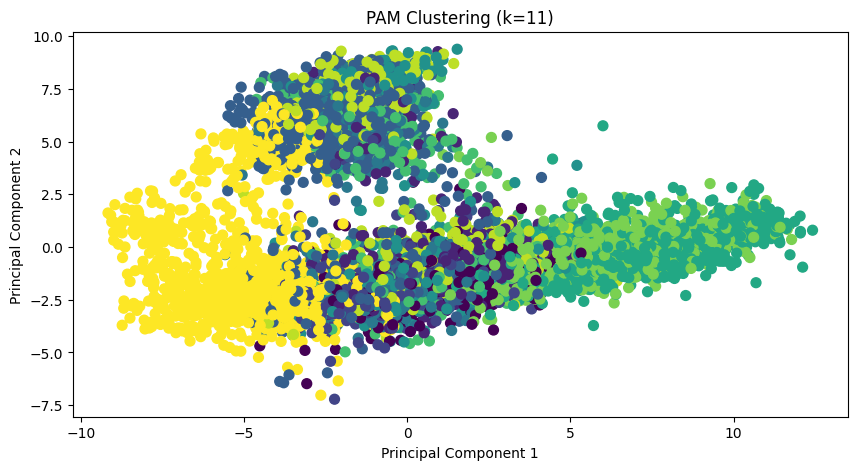


Clustering Results (k=11):
  PAM Silhouette Score: -0.028


In [43]:
# Use PAM_clustering function
PAM_clustering(scaled_features)

**3. Density-based clustering: DBSCAN**

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

def density_based_clustering(X, eps_values=[4.5, 4.6, 4.7]):
    """Performs DBSCAN clustering with parameter tuning and evaluates the results."""

    # Start with a min_samples value based on the dimensionality of the data
    min_samples_values = [120, 140, 150, 160]

    best_score = -1
    best_params = {}
    best_labels = None

    # Find optimal eps using the elbow method
    neigh = NearestNeighbors(n_neighbors=max(min_samples_values))
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, -1], axis=0)  # Use the distance to the farthest neighbor
    plt.plot(distances)
    plt.title("Elbow Method for Finding Optimal eps")
    plt.xlabel("Points sorted by distance")
    plt.ylabel("Distance to farthest neighbor")
    plt.show()

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Evaluation
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            if n_clusters > 1:  # Only calculate Silhouette Score if there are at least 2 clusters

                # Exclude noise points (-1) from silhouette score calculation
                core_samples_mask = np.zeros_like(labels, dtype=bool)
                core_samples_mask[dbscan.core_sample_indices_] = True
                labels_without_noise = labels[core_samples_mask]
                X_without_noise = X[core_samples_mask]

                silhouette_avg = silhouette_score(X_without_noise, labels_without_noise)
                print(f"\nDBSCAN Clustering (eps={eps:.2f}, min_samples={min_samples}):")
                print(f"  Number of clusters: {n_clusters}")
                print(f"  Silhouette Score: {silhouette_avg:.3f}")

                # Check if this is the best score so far
                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_params = {'eps': eps, 'min_samples': min_samples}
                    best_labels = labels

        # Visualization with PCA for better interpretability (only for the best model)
        if best_labels is not None:
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X)

            plt.figure(figsize=(8, 6))
            plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis')
            plt.title(f'Best DBSCAN Clustering (eps={best_params["eps"]:.2f}, min_samples={best_params["min_samples"]})')
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.show()

    if best_params:
        print(f"\nBest DBSCAN parameters: {best_params}")
        print(f"Best Silhouette Score: {best_score:.3f}")
    else:
        print("\nNo suitable DBSCAN model found.")


DBSCAN Clustering (eps=4.50, min_samples=120):
  Number of clusters: 2
  Silhouette Score: 0.447

DBSCAN Clustering (eps=4.50, min_samples=140):
  Number of clusters: 2
  Silhouette Score: 0.449

DBSCAN Clustering (eps=4.50, min_samples=150):
  Number of clusters: 2
  Silhouette Score: 0.460

DBSCAN Clustering (eps=4.50, min_samples=160):
  Number of clusters: 2
  Silhouette Score: 0.463


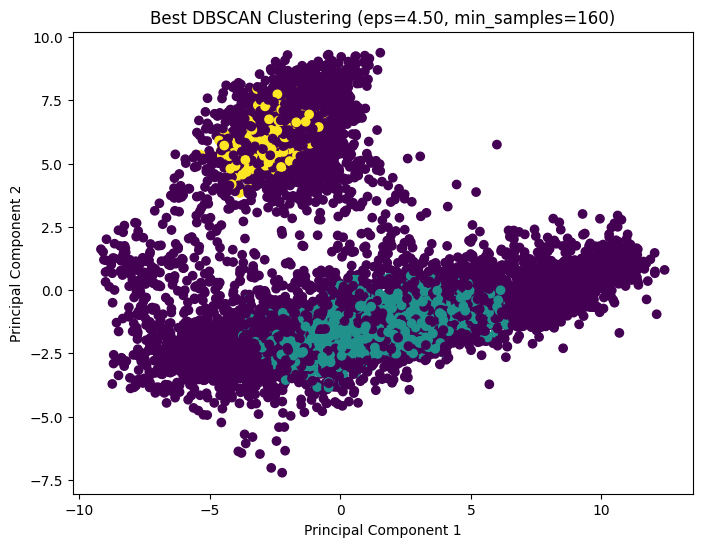


DBSCAN Clustering (eps=4.60, min_samples=120):
  Number of clusters: 2
  Silhouette Score: 0.437

DBSCAN Clustering (eps=4.60, min_samples=140):
  Number of clusters: 2
  Silhouette Score: 0.446

DBSCAN Clustering (eps=4.60, min_samples=150):
  Number of clusters: 2
  Silhouette Score: 0.452

DBSCAN Clustering (eps=4.60, min_samples=160):
  Number of clusters: 2
  Silhouette Score: 0.448


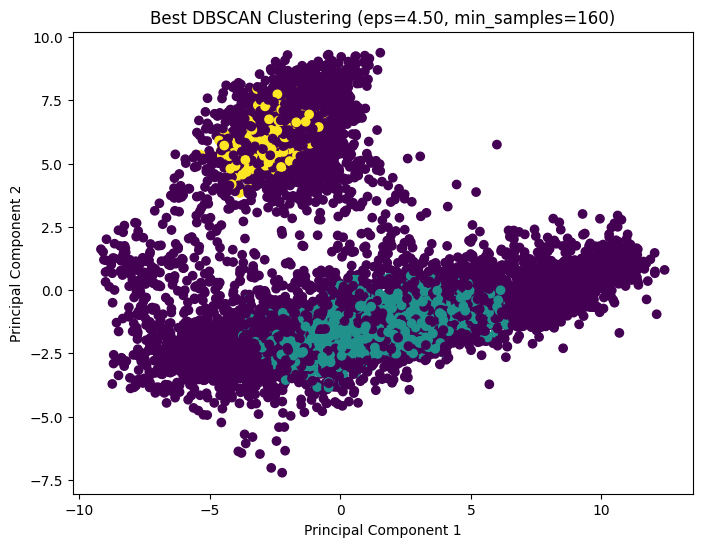


DBSCAN Clustering (eps=4.70, min_samples=120):
  Number of clusters: 2
  Silhouette Score: 0.424

DBSCAN Clustering (eps=4.70, min_samples=140):
  Number of clusters: 2
  Silhouette Score: 0.434

DBSCAN Clustering (eps=4.70, min_samples=150):
  Number of clusters: 2
  Silhouette Score: 0.438

DBSCAN Clustering (eps=4.70, min_samples=160):
  Number of clusters: 2
  Silhouette Score: 0.441


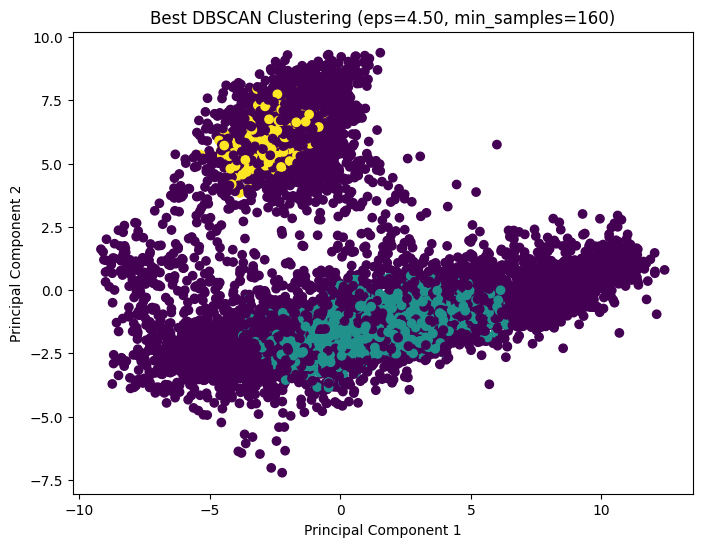


Best DBSCAN parameters: {'eps': 4.5, 'min_samples': 160}
Best Silhouette Score: 0.463


In [45]:
# Use the function
density_based_clustering(scaled_features)

**4. Probability-Based Clustering: Gaussian Mixture Models**

In [47]:
def probability_based_clustering(X, n_components_range=range(2, 12)):
    """Performs GMM clustering with different numbers of components and evaluates the results."""
    bics = []
    aics = []  
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        bics.append(gmm.bic(X))
        aics.append(gmm.aic(X))  

    # Choose the optimal number of components based on the BIC plot
    optimal_k_bic = n_components_range[bics.index(min(bics))]
    optimal_k_aic = n_components_range[aics.index(min(aics))]

    # Plot BIC and AIC to find the elbow
    plt.figure(figsize=(10, 5))
    plt.plot(n_components_range, bics, marker='o', label='BIC')
    plt.plot(n_components_range, aics, marker='x', label='AIC')
    plt.title('BIC and AIC for GMM')
    plt.xlabel('Number of components')
    plt.ylabel('Information Criterion')
    plt.legend()

    plt.scatter(optimal_k_bic, bics[bics.index(min(bics))], marker='x', s=150, color='red', zorder=5)  # BIC
    plt.scatter(optimal_k_aic, aics[aics.index(min(aics))], marker='x', s=150, color='blue', zorder=5)  # AIC

    plt.show()

    # --- Fit GMM with the optimal number of components for both BIC and AIC ---
    for optimal_k, criterion in zip([optimal_k_bic, optimal_k_aic], ['BIC', 'AIC']):
        gmm = GaussianMixture(n_components=optimal_k, random_state=42)
        labels = gmm.fit_predict(X)

        # Visualization with PCA for better interpretability
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
        plt.title(f'GMM Clustering (Optimal k={optimal_k} based on {criterion})')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

        # Evaluation
        print(f"\nGMM Clustering (k={optimal_k} based on {criterion}):")
        print(f"  Silhouette Score: {silhouette_score(X, labels):.3f}")

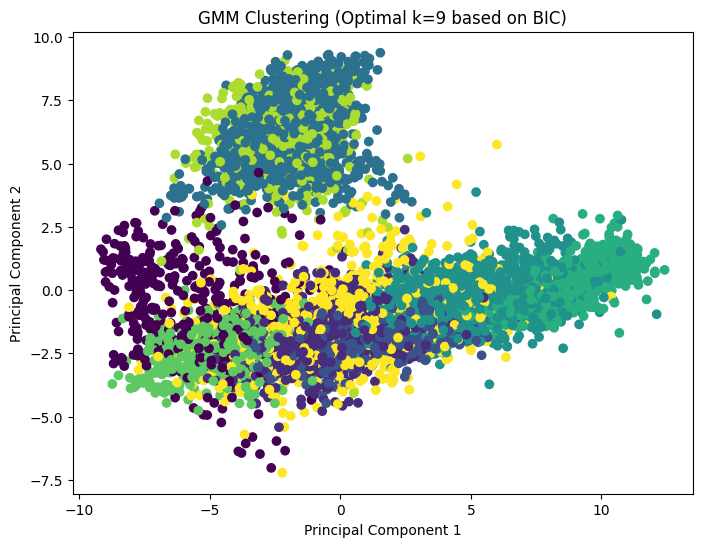


GMM Clustering (k=9 based on BIC):
  Silhouette Score: 0.053



GMM Clustering (k=11 based on AIC):
  Silhouette Score: 0.023


In [48]:
probability_based_clustering(scaled_features)

# **FEATURE SELECTION**



Feature selection with LogisticRegression and penalty L1 (Lasso)

In [49]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [50]:
# We drop AGA column from train set in order to fit a model that will be albe to predict AGA frequencies (so it cannot depend on AGA presence)
train_df4 = train_df2.drop(columns='AGA', axis=1)
train_df4.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0    872  vrl       0.01541  0.00927  0.01720  0.01825  0.01436  0.02303   
1   9865  inv       0.01213  0.02515  0.00268  0.01352  0.01372  0.01143   
2   3190  bct       0.02580  0.01618  0.03606  0.01354  0.00848  0.02067   
3   3674  bct       0.00128  0.02141  0.01225  0.01649  0.01330  0.01308   
4  11372  vrt       0.03169  0.01780  0.03893  0.00000  0.06240  0.01056   

       CUA      CUG  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01555  0.02094  ...  0.00853  0.00643  0.01182  0.02812  0.00838   
1  0.00775  0.02992  ...  0.00378  0.00268  0.01412  0.03280  0.02555   
2  0.01041  0.00278  ...  0.00570  0.00114  0.00499  0.03756  0.02523   
3  0.00399  0.02834  ...  0.00359  0.01177  0.00422  0.03316  0.02229   
4  0.05262  0.01408  ...  0.01056  0.00000  0.00000  0.00020  0.01389   

       GAA      GAG      UAA      UAG      UGA  
0  0.03365  0.01974  0.01511  0.00030  0.00030  
1  0.03708  0.05398  0.03330  0.00030  0.00050  
2  0.05388  0.01946  0.02245  0.00121  0.00086  
3  0.03444  0.02370  0.00831  0.00028  0.00063  
4  0.02465  0.00352  0.00352  0.00000  0.02465  

[5 rows x 65 columns]

In [51]:
test_df2.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0  5114  bct       0.00959  0.01359  0.01584  0.01312  0.02491  0.02457   
1  8747  inv       0.01223  0.03447  0.00508  0.01811  0.01176  0.02335   
2  6220  pln       0.01014  0.03014  0.00145  0.01275  0.01420  0.02521   
3  6144  pln       0.03551  0.02892  0.00155  0.01117  0.01224  0.02475   
4  6783  pln       0.01662  0.01400  0.02800  0.03412  0.01312  0.02625   

       CUA      CUG  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01885  0.01269  ...  0.00354  0.00121  0.00709  0.02980  0.04135   
1  0.00413  0.02017  ...  0.00763  0.00524  0.01001  0.02621  0.03368   
2  0.00261  0.01101  ...  0.00551  0.00058  0.00174  0.02753  0.02695   
3  0.00511  0.02233  ...  0.00303  0.00451  0.00356  0.02865  0.02401   
4  0.02100  0.01137  ...  0.01662  0.00175  0.01837  0.03062  0.02362   

       GAA      GAG      UAA      UAG      UGA  
0  0.02608  0.03877  0.01183  0.00061  0.00117  
1  0.02303  0.03066  0.03479  0.00064  0.00064  
2  0.00637  0.01826  0.03216  0.00116  0.00029  
3  0.01594  0.03390  0.01628  0.00108  0.00047  
4  0.03150  0.01575  0.02625  0.00087  0.00525  

[5 rows x 65 columns]

In [52]:
from sklearn.linear_model import LogisticRegression

X = train_df4.iloc[:, 2:]
y = pd.factorize(train_df4['Kingdom'])[0]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1.0, 10],
    'n_jobs' : [-1],  # use all cores to speed up the analysis
    'penalty': ['l1'],
    'solver': ['saga'], # saga is the best solver (optimizing algorithm) for multiclass classification problems (liblinear is for binary classification problems)
    'max_iter': [5000]  # Increase iterations for convergence (1000 is too low)
}

logreg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)
best_logreg = grid_search.best_estimator_

print("Best accuracy score on training data:", grid_search.best_score_)

# Feature Selection
selected_feature_indices = best_logreg.coef_[0] != 0  # Boolean array indicating selected features
selected_features = X_train.columns[selected_feature_indices]

# Creating Datasets with Selected Features
X_train_selected = X_train.loc[:, selected_feature_indices]
X_val_selected = X_val.loc[:, selected_feature_indices]

print(f'Number of features selected by Logistic Regression: {len(selected_features)}')
print(f'Selected Features: {selected_features}')


Best hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 5000, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}
Best accuracy score on training data: 0.815163657915899
Number of features selected by Logistic Regression: 48
Selected Features: Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCC', 'GCA', 'GCG', 'CCC', 'CCA',
       'UGG', 'GGC', 'GGA', 'UCU', 'UCA', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA',
       'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAC',
       'AAA', 'CGU', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UGA'],
      dtype='object')


In [53]:
X_train_selected.head()

UUU      UUC      UUA      UUG      CUU      CUA      CUG      AUU  \
6870  0.01613  0.01229  0.01229  0.02765  0.03072  0.00998  0.01536  0.02304   
1109  0.01354  0.01003  0.07272  0.01555  0.02558  0.01003  0.00351  0.11033   
6270  0.02174  0.01779  0.05237  0.02964  0.02174  0.01482  0.00000  0.05040   
5549  0.01765  0.01880  0.00952  0.01460  0.01524  0.00802  0.03457  0.01856   
1038  0.02783  0.01311  0.00482  0.01177  0.01418  0.00508  0.03452  0.01953   

          AUC      AUA  ...      UGC      CAC      AAA      CGU      AGG  \
6870  0.01075  0.02304  ...  0.00614  0.00538  0.02304  0.00998  0.01613   
1109  0.00853  0.05767  ...  0.00201  0.00502  0.02758  0.00451  0.00150   
6270  0.01087  0.02174  ...  0.00395  0.00198  0.06818  0.01482  0.00198   
5549  0.01947  0.00904  ...  0.01116  0.01374  0.02875  0.00489  0.01206   
1038  0.02756  0.00535  ...  0.00776  0.00910  0.03051  0.00749  0.00910   

          GAU      GAC      GAA      GAG      UGA  
6870  0.03917  0.01843  0.04301  0.03994  0.00154  
1109  0.01053  0.09880  0.01755  0.00351  0.02056  
6270  0.02964  0.08597  0.02372  0.01383  0.00000  
5549  0.02414  0.00834  0.03325  0.03704  0.00173  
1038  0.02676  0.00187  0.03559  0.04603  0.00080  

[5 rows x 48 columns]

LogisticRegression with penalty L1 (lasso) selected 48 out of 63 codons (63 because we don't have AGA yet), with a model accuracy of 82%. We can assume that these are the most correlated features with Kingdom classes.

# **CLASSIFICATION**

We will perform:
1. Logistic Regression
2. Linear Discriminant Analysis (LDA)
3. Quadratic Discriminant Analysis (QDA)
4. Support Vector Machines (SVM)
5. Random Forest

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

# function to evaluate classifier --> to be applied to each of the above mentioned classifiers

def evaluate_classifier(model, X_train, y_train, X_val, y_val, multi_class='ovo'):
    """
    Evaluates a classifier, prints metrics, and plots ROC curve.
    """

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("\nClassification Report:\n", classification_report(y_val, y_pred, zero_division=0))
 
    # ROC AUC for multi-class problems 

    # Binarize the labels
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_val_bin = label_binarize(y_val, classes=np.unique(y_train))

    # Use OneVsRestClassifier for OvR approach
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train_bin).predict_proba(X_val)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(y_train))):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    for i in range(len(np.unique(y_train))):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}, area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) for Each Class (OvR)')
    plt.legend(loc="lower right")
    plt.show()

    # Confusion Matrix with Labels and Percentages
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_train), yticklabels=np.unique(y_train),
                cbar_kws={'label': 'Number of Samples'})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Cross-Validation: Mean and Standard Deviation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'\nCross-validation accuracy scores: {cv_scores}')
    print(f'Mean cross-validation accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}')

In [55]:
from sklearn.preprocessing import StandardScaler

# Standardize 48 selected features
scaler1 = StandardScaler()
X_train_selected_scaled = scaler1.fit_transform(X_train_selected)
X_val_selected_scaled = scaler1.transform(X_val_selected) # Use the same scaler for validation

scaler2 = StandardScaler()
# Standardize all 63 features
X_train_scaled = scaler2.fit_transform(X_train)
X_val_scaled = scaler2.fit_transform(X_val)

In [56]:
# Convert scaled data back to DataFrame
X_train_selected_scaled_df = pd.DataFrame(X_train_selected_scaled, columns=X_train_selected.columns)

# check df with selected features
X_train_selected_scaled_df.head()

UUU       UUC       UUA       UUG       CUU       CUA       CUG  \
0 -0.074066 -0.956536 -0.396240  1.449474  1.245343 -0.373697 -0.188249   
1 -0.270904 -1.148297  2.531186  0.147827  0.752634 -0.371654 -0.904232   
2  0.352289 -0.489860  1.545365  1.663547  0.384541 -0.175940 -1.116308   
3  0.041452 -0.404161 -0.530428  0.045631 -0.238533 -0.453780  0.972430   
4  0.815124 -0.886959 -0.758112 -0.258804 -0.340143 -0.573905  0.969409   

        AUU       AUC       AUA  ...       UGC       CAC       AAA       CGU  \
0 -0.298299 -0.976371  0.301909  ... -0.231096 -1.023003 -0.301391  0.315679   
1  4.647758 -1.126928  2.451248  ... -0.884513 -1.077080 -0.045650 -0.549889   
2  1.251983 -0.968233  0.221223  ... -0.577581 -1.533734  2.241370  1.081555   
3 -0.552146 -0.384994 -0.567013  ...  0.563130  0.232793  0.020257 -0.489758   
4 -0.497183  0.163658 -0.796036  ...  0.025208 -0.464204  0.119399 -0.078337   

        AGG       GAU       GAC       GAA       GAG       UGA  
0  1.552196  1.073485  0.101529  1.040581  1.237162 -0.446858  
1 -0.775553 -0.985286  6.135272 -0.749431 -1.228250  1.378163  
2 -0.699181  0.388426  5.172065 -0.315638 -0.529841 -0.594625  
3  0.904627 -0.006939 -0.655974  0.354386  1.040903 -0.428627  
4  0.433667  0.181399 -1.141706  0.518904  1.649304 -0.517863  

[5 rows x 48 columns]

In [57]:
# Convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# check df with all features
X_train_scaled_df.head()

UUU       UUC       UUA       UUG       CUU       CUC       CUA  \
0 -0.074066 -0.956536 -0.396240  1.449474  1.245343 -0.084050 -0.373697   
1 -0.270904 -1.148297  2.531186  0.147827  0.752634 -0.541512 -0.371654   
2  0.352289 -0.489860  1.545365  1.663547  0.384541 -0.552761 -0.175940   
3  0.041452 -0.404161 -0.530428  0.045631 -0.238533 -1.205206 -0.453780   
4  0.815124 -0.886959 -0.758112 -0.258804 -0.340143  0.532399 -0.573905   

        CUG       AUU       AUC  ...       CGA       CGG       AGG       GAU  \
0 -0.188249 -0.298299 -0.976371  ...  1.765529  0.820331  1.552196  1.073485   
1 -0.904232  4.647758 -1.126928  ... -0.196612 -0.522225 -0.775553 -0.985286   
2 -1.116308  1.251983 -0.968233  ...  1.652087  0.534616 -0.699181  0.388426   
3  0.972430 -0.552146 -0.384994  ... -0.104177  0.695907  0.904627 -0.006939   
4  0.969409 -0.497183  0.163658  ... -0.337365 -0.502256  0.433667  0.181399   

        GAC       GAA       GAG       UAA       UAG       UGA  
0  0.101529  1.040581  1.237162 -0.698723  1.902534 -0.446858  
1  6.135272 -0.749431 -1.228250 -0.942476 -0.100558  1.378163  
2  5.172065 -0.315638 -0.529841 -0.833287 -0.656972 -0.594625  
3 -0.655974  0.354386  1.040903  0.243992  0.255548 -0.428627  
4 -1.141706  0.518904  1.649304 -0.219676 -0.356508 -0.517863  

[5 rows x 63 columns]

**1. Logistic Regression**

Logistic regression without l1 penalty: 
Accuracy: 0.8330935251798561

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       450
           1       0.67      0.55      0.61       197
           2       0.90      0.92      0.91       472
           3       0.88      0.91      0.90       316
           4       0.84      0.84      0.84       415
           5       0.67      0.86      0.75        21
           6       0.63      0.48      0.54        46
           7       0.73      0.73      0.73        91
           8       0.81      0.73      0.77        41
           9       0.65      0.50      0.57        34
          10       0.00      0.00      0.00         2

    accuracy                           0.83      2085
   macro avg       0.69      0.67      0.68      2085
weighted avg       0.83      0.83      0.83      2085



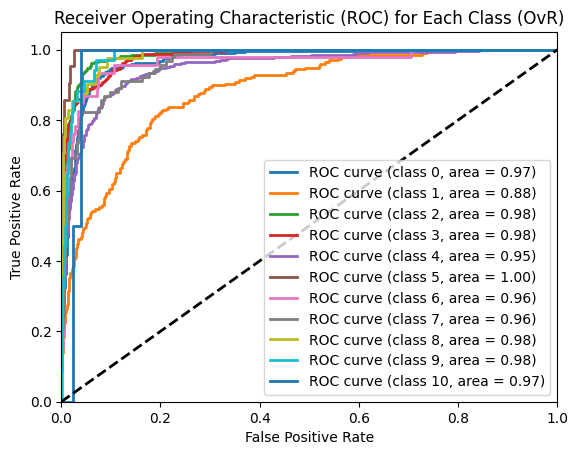

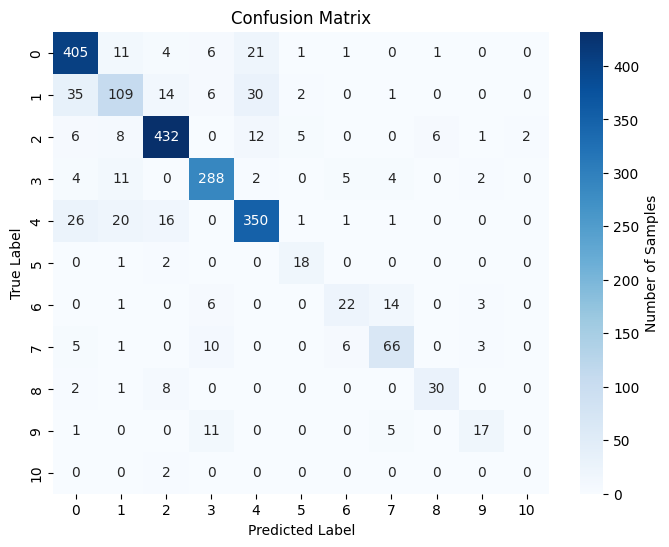


Cross-validation accuracy scores: [0.83872902 0.80335731 0.85002999 0.83323335 0.82663467]
Mean cross-validation accuracy: 0.830 ± 0.016

Logistic regression with l1 penalty: 
Accuracy: 0.8326139088729017

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       450
           1       0.67      0.55      0.61       197
           2       0.90      0.92      0.91       472
           3       0.88      0.91      0.90       316
           4       0.84      0.84      0.84       415
           5       0.67      0.86      0.75        21
           6       0.63      0.48      0.54        46
           7       0.73      0.73      0.73        91
           8       0.79      0.73      0.76        41
           9       0.67      0.53      0.59        34
          10       0.00      0.00      0.00         2

    accuracy                           0.83      2085
   macro avg       0.69      0.68      0.68      2085
weighted av

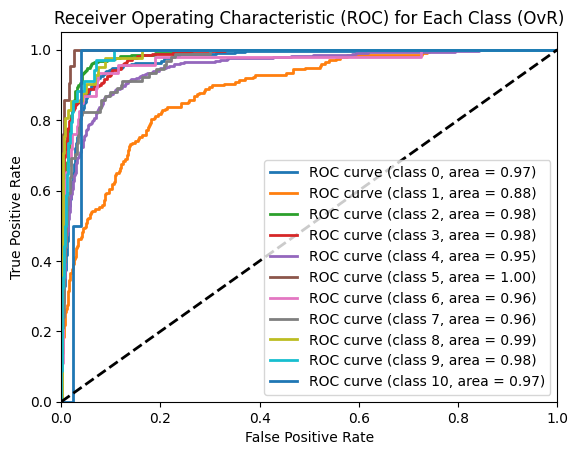

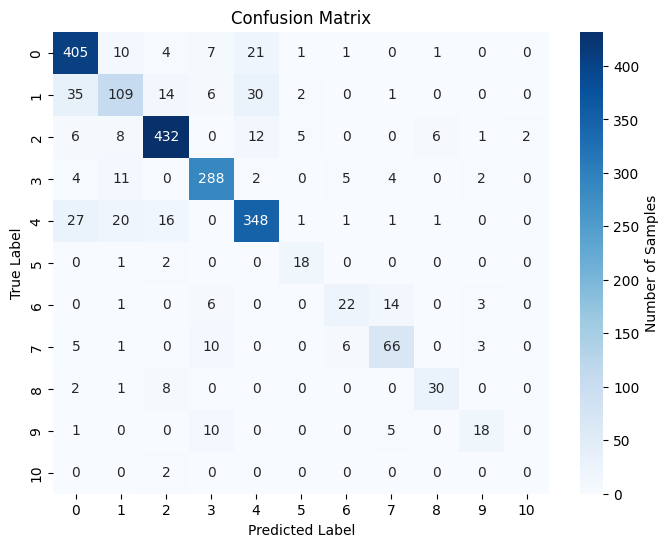


Cross-validation accuracy scores: [0.8381295  0.80215827 0.84883023 0.83323335 0.82723455]
Mean cross-validation accuracy: 0.830 ± 0.016


In [58]:
from sklearn.linear_model import LogisticRegression

# use logisticregression with l1 penalty already trained

logreg = LogisticRegression(solver='saga', max_iter=5000, C = 10, n_jobs = -1)
logreg.fit(X_train_scaled, y_train)

# Evaluate the models
print("Logistic regression without l1 penalty: ") # Logistic regression without l1 (lasso) penalty --> all 63 codons
evaluate_classifier(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

print("\nLogistic regression with l1 penalty: ") # Logistic regression with l1 (lass) penalty --> selected features
evaluate_classifier(best_logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Note: LogisticRegression without L1 penalty shows a slightly better accurcay than the regularized one, but the regularized one may better prevent Overfitting. We can also observe that accuracy increased a bit after scaling the features: Accuracy without scaling: 0.82 - Accuracy with scaling: 0.83


**2. Linear Discriminant Analysis (LDA)**

Accuracy: 0.7803357314148681

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       450
           1       0.56      0.41      0.47       197
           2       0.88      0.88      0.88       472
           3       0.90      0.79      0.84       316
           4       0.77      0.80      0.79       415
           5       0.61      0.81      0.69        21
           6       0.75      0.46      0.57        46
           7       0.71      0.71      0.71        91
           8       0.62      0.80      0.70        41
           9       0.36      0.41      0.38        34
          10       0.00      0.00      0.00         2

    accuracy                           0.78      2085
   macro avg       0.63      0.63      0.62      2085
weighted avg       0.78      0.78      0.78      2085



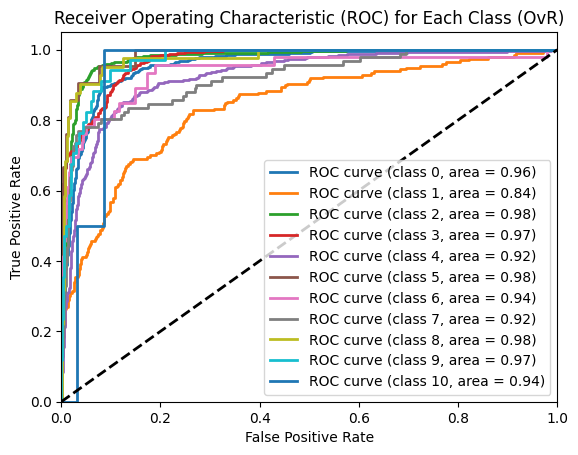

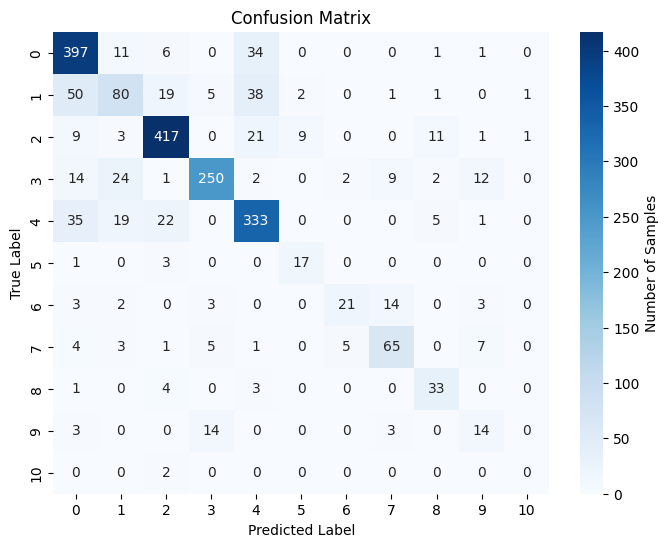


Cross-validation accuracy scores: [0.76318945 0.76079137 0.78644271 0.77264547 0.75824835]
Mean cross-validation accuracy: 0.768 ± 0.010


In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected, y_train)

evaluate_classifier(lda, X_train_selected_scaled, y_train, X_val_selected_scaled, y_val)

**3. Quadratic Discriminant Analysis (QDA)**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.814388489208633

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       450
           1       0.59      0.58      0.59       197
           2       0.91      0.92      0.91       472
           3       0.92      0.87      0.89       316
           4       0.85      0.70      0.77       415
           5       0.92      0.57      0.71        21
           6       0.82      0.59      0.68        46
           7       0.74      0.82      0.78        91
           8       0.79      0.66      0.72        41
           9       0.91      0.59      0.71        34
          10       0.00      0.00      0.00         2

    accuracy                           0.81      2085
   macro avg       0.75      0.66      0.69      2085
weighted avg       0.82      0.81      0.81      2085



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


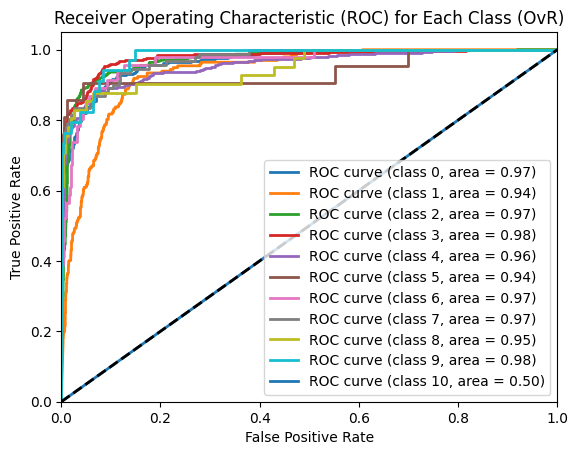

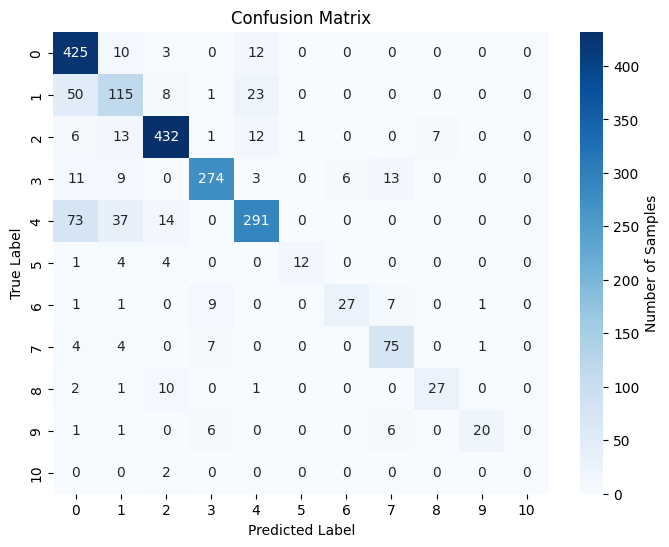

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Cross-validation accuracy scores: [0.82134293 0.79676259 0.81103779 0.79244151 0.80623875]
Mean cross-validation accuracy: 0.806 ± 0.010


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [85]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train_selected, y_train)

evaluate_classifier(QDA, X_train_selected_scaled, y_train, X_val_selected_scaled, y_val) 

# Note: QDA found collinearity in the variables

**4. Support Vector Machines (SVM)**

In [86]:
from sklearn.svm import SVC

svm= SVC(kernel='linear', C=0.01, gamma='scale', probability=True)
svm.fit(X_train_selected, y_train)

evaluate_classifier(svm, X_train_selected_scaled, y_train, X_val_selected_scaled, y_val)

Accuracy: 0.8057553956834532

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       450
           1       0.66      0.48      0.56       197
           2       0.86      0.95      0.90       472
           3       0.80      0.94      0.86       316
           4       0.83      0.83      0.83       415
           5       0.92      0.57      0.71        21
           6       1.00      0.02      0.04        46
           7       0.63      0.70      0.66        91
           8       0.83      0.12      0.21        41
           9       1.00      0.06      0.11        34
          10       0.00      0.00      0.00         2

    accuracy                           0.81      2085
   macro avg       0.76      0.51      0.52      2085
weighted avg       0.81      0.81      0.78      2085




Cross-validation accuracy scores: [0.8177458  0.79736211 0.81823635 0.80683863 0.81283743]
Mean cross-validation accuracy: 0.811 ± 0.008


**5. Random Forest**

In [93]:
from sklearn.ensemble import RandomForestClassifier

param_grid = { 
    'n_estimators': [100, 200],  
    'max_features': ['sqrt'],  
    'max_depth' : [5, 10],  
    'criterion' :['gini']  
}

rfc = RandomForestClassifier(random_state=42, n_jobs= -1)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_selected_scaled, y_train)
print(CV_rfc.best_params_)

best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train_selected, y_train)

evaluate_classifier(best_rfc, X_train_selected_scaled, y_train, X_val_selected_scaled, y_val)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy: 0.8292565947242206

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       450
           1       0.92      0.45      0.60       197
           2       0.87      0.96      0.91       472
           3       0.84      0.92      0.88       316
           4       0.82      0.87      0.84       415
           5       1.00      0.24      0.38        21
           6       1.00      0.35      0.52        46
           7       0.76      0.74      0.75        91
           8       1.00      0.32      0.48        41
           9       0.91      0.29      0.44        34
          10       0.00      0.00      0.00         2

    accuracy                           0.83      2085
   macro avg       0.81      0.55      0.61      2085
weighted avg       0.84      0.83      0.81      2085




Cross-validation accuracy scores: [0.82134293 0.83513189 0.84403119 0.82483503 0.83383323]
Mean cross-validation accuracy: 0.832 ± 0.008


**Performance evaluation of the best algorithm on test set**

We will consider LogisticRegression as best classification algorithm for our data: is it more simple and interpretable and hopefully less prone to Overfitting. 

In [94]:
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

def evaluate_test_classifier(model, X_test, y_test, multi_class='ovo'):
    """
    Evaluates a classifier on the test set, prints metrics, and plots ROC curve (for binary classification).
    """

    y_pred = model.predict(X_test)

    print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # ROC curve for binary classification
    if len(np.unique(y_test)) == 2:  
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()

    # ROC AUC for multi-class problems
    elif len(np.unique(y_test)) > 2: 
        # Binarize the labels
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

        # Use OneVsRestClassifier for OvR approach
        classifier = OneVsRestClassifier(model)
        y_score = classifier.fit(X_test, y_test_bin).predict_proba(X_test) 

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(np.unique(y_test))):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot all ROC curves
        plt.figure()
        for i in range(len(np.unique(y_test))):
            plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}, area = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) for Each Class (OvR)')
        plt.legend(loc="lower right")
        plt.show()

        # Confusion Matrix with Labels and Percentages
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
                    cbar_kws={'label': 'Number of Samples'})
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

In [95]:
# check test set
test_df2.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0  5114  bct       0.00959  0.01359  0.01584  0.01312  0.02491  0.02457   
1  8747  inv       0.01223  0.03447  0.00508  0.01811  0.01176  0.02335   
2  6220  pln       0.01014  0.03014  0.00145  0.01275  0.01420  0.02521   
3  6144  pln       0.03551  0.02892  0.00155  0.01117  0.01224  0.02475   
4  6783  pln       0.01662  0.01400  0.02800  0.03412  0.01312  0.02625   

       CUA      CUG  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01885  0.01269  ...  0.00354  0.00121  0.00709  0.02980  0.04135   
1  0.00413  0.02017  ...  0.00763  0.00524  0.01001  0.02621  0.03368   
2  0.00261  0.01101  ...  0.00551  0.00058  0.00174  0.02753  0.02695   
3  0.00511  0.02233  ...  0.00303  0.00451  0.00356  0.02865  0.02401   
4  0.02100  0.01137  ...  0.01662  0.00175  0.01837  0.03062  0.02362   

       GAA      GAG      UAA      UAG      UGA  
0  0.02608  0.03877  0.01183  0.00061  0.00117  
1  0.02303  0.03066  0.03479  0.00064  0.00064  
2  0.00637  0.01826  0.03216  0.00116  0.00029  
3  0.01594  0.03390  0.01628  0.00108  0.00047  
4  0.03150  0.01575  0.02625  0.00087  0.00525  

[5 rows x 65 columns]

In [100]:
# Preprocessing of test data
X_test = test_df2.iloc[:, 2:]
y_test = pd.factorize(test_df2['Kingdom'])[0]

# Select only the features chosen by LogisticRegression (penalty l1) from the test set 
X_test_selected = X_test[selected_features]  

# Standardize test data using the scaler fitted on the training data
X_test_selected_scaled = scaler1.transform(X_test_selected) # Use the scaled version of X_test_selected

print(f"Number of selected features: {len(X_test_selected.columns)}")
print(f"Selected features: {X_test_selected.columns}")

Number of selected features: 48
Selected features: Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCC', 'GCA', 'GCG', 'CCC', 'CCA',
       'UGG', 'GGC', 'GGA', 'UCU', 'UCA', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA',
       'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAC',
       'AAA', 'CGU', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UGA'],
      dtype='object')


**Logistic Regression on test set**

In [102]:
# Evaluate best LogisticRegression on test data
best_logreg.fit(X_test_selected_scaled, y_test)
evaluate_test_classifier(best_logreg, X_test_selected_scaled, y_test)

Accuracy on the test set: 0.8514965464313123

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       584
           1       0.72      0.60      0.65       269
           2       0.81      0.82      0.81       505
           3       0.86      0.91      0.88       567
           4       0.82      0.78      0.80       114
           5       0.96      0.92      0.94        25
           6       0.86      0.70      0.78        44
           7       0.88      0.92      0.90       415
           8       0.82      0.72      0.77        43
           9       0.85      0.64      0.73        36
          10       1.00      0.50      0.67         4

    accuracy                           0.85      2606
   macro avg       0.86      0.77      0.80      2606
weighted avg       0.85      0.85      0.85      2606



LogisticRegression correctly predicted 85% of the classes

# **REGRESSION**


In [103]:
# train sample check
train_df2.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0    872  vrl       0.01541  0.00927  0.01720  0.01825  0.01436  0.02303   
1   9865  inv       0.01213  0.02515  0.00268  0.01352  0.01372  0.01143   
2   3190  bct       0.02580  0.01618  0.03606  0.01354  0.00848  0.02067   
3   3674  bct       0.00128  0.02141  0.01225  0.01649  0.01330  0.01308   
4  11372  vrt       0.03169  0.01780  0.03893  0.00000  0.06240  0.01056   

       CUA      CUG  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.01555  0.02094  ...  0.00643  0.02064  0.01182  0.02812  0.00838   
1  0.00775  0.02992  ...  0.00268  0.00915  0.01412  0.03280  0.02555   
2  0.01041  0.00278  ...  0.00114  0.01775  0.00499  0.03756  0.02523   
3  0.00399  0.02834  ...  0.01177  0.00705  0.00422  0.03316  0.02229   
4  0.05262  0.01408  ...  0.00000  0.00000  0.00000  0.00020  0.01389   

       GAA      GAG      UAA      UAG      UGA  
0  0.03365  0.01974  0.01511  0.00030  0.00030  
1  0.03708  0.05398  0.03330  0.00030  0.00050  
2  0.05388  0.01946  0.02245  0.00121  0.00086  
3  0.03444  0.02370  0.00831  0.00028  0.00063  
4  0.02465  0.00352  0.00352  0.00000  0.02465  

[5 rows x 66 columns]

In [104]:
# test sample check
test_df2.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0  5114  bct       0.00959  0.01359  0.01584  0.01312  0.02491  0.02457   
1  8747  inv       0.01223  0.03447  0.00508  0.01811  0.01176  0.02335   
2  6220  pln       0.01014  0.03014  0.00145  0.01275  0.01420  0.02521   
3  6144  pln       0.03551  0.02892  0.00155  0.01117  0.01224  0.02475   
4  6783  pln       0.01662  0.01400  0.02800  0.03412  0.01312  0.02625   

       CUA      CUG  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01885  0.01269  ...  0.00354  0.00121  0.00709  0.02980  0.04135   
1  0.00413  0.02017  ...  0.00763  0.00524  0.01001  0.02621  0.03368   
2  0.00261  0.01101  ...  0.00551  0.00058  0.00174  0.02753  0.02695   
3  0.00511  0.02233  ...  0.00303  0.00451  0.00356  0.02865  0.02401   
4  0.02100  0.01137  ...  0.01662  0.00175  0.01837  0.03062  0.02362   

       GAA      GAG      UAA      UAG      UGA  
0  0.02608  0.03877  0.01183  0.00061  0.00117  
1  0.02303  0.03066  0.03479  0.00064  0.00064  
2  0.00637  0.01826  0.03216  0.00116  0.00029  
3  0.01594  0.03390  0.01628  0.00108  0.00047  
4  0.03150  0.01575  0.02625  0.00087  0.00525  

[5 rows x 65 columns]

In [158]:
# Prepare for regression models
train_df5 = train_df2.iloc[:, 1:].drop(['Kingdom'], axis = 1)
train_df5.head()

UUU      UUC      UUA      UUG      CUU      CUC      CUA      CUG  \
0  0.01541  0.00927  0.01720  0.01825  0.01436  0.02303  0.01555  0.02094   
1  0.01213  0.02515  0.00268  0.01352  0.01372  0.01143  0.00775  0.02992   
2  0.02580  0.01618  0.03606  0.01354  0.00848  0.02067  0.01041  0.00278   
3  0.00128  0.02141  0.01225  0.01649  0.01330  0.01308  0.00399  0.02834   
4  0.03169  0.01780  0.03893  0.00000  0.06240  0.01056  0.05262  0.01408   

       AUU      AUC  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.01885  0.01226  ...  0.00643  0.02064  0.01182  0.02812  0.00838   
1  0.01352  0.03370  ...  0.00268  0.00915  0.01412  0.03280  0.02555   
2  0.03250  0.01768  ...  0.00114  0.01775  0.00499  0.03756  0.02523   
3  0.02508  0.02611  ...  0.01177  0.00705  0.00422  0.03316  0.02229   
4  0.03873  0.03873  ...  0.00000  0.00000  0.00000  0.00020  0.01389   

       GAA      GAG      UAA      UAG      UGA  
0  0.03365  0.01974  0.01511  0.00030  0.00030  
1  0.03708  0.05398  0.03330  0.00030  0.00050  
2  0.05388  0.01946  0.02245  0.00121  0.00086  
3  0.03444  0.02370  0.00831  0.00028  0.00063  
4  0.02465  0.00352  0.00352  0.00000  0.02465  

[5 rows x 64 columns]

In [159]:
# Prepare for regression models
test_df4 = test_df2.iloc[:, 1:].drop(['Kingdom'], axis = 1)
test_df4.head()

UUU      UUC      UUA      UUG      CUU      CUC      CUA      CUG  \
0  0.00959  0.01359  0.01584  0.01312  0.02491  0.02457  0.01885  0.01269   
1  0.01223  0.03447  0.00508  0.01811  0.01176  0.02335  0.00413  0.02017   
2  0.01014  0.03014  0.00145  0.01275  0.01420  0.02521  0.00261  0.01101   
3  0.03551  0.02892  0.00155  0.01117  0.01224  0.02475  0.00511  0.02233   
4  0.01662  0.01400  0.02800  0.03412  0.01312  0.02625  0.02100  0.01137   

       AUU      AUC  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01319  0.03672  ...  0.00354  0.00121  0.00709  0.02980  0.04135   
1  0.01334  0.03161  ...  0.00763  0.00524  0.01001  0.02621  0.03368   
2  0.02492  0.03796  ...  0.00551  0.00058  0.00174  0.02753  0.02695   
3  0.01392  0.03101  ...  0.00303  0.00451  0.00356  0.02865  0.02401   
4  0.03412  0.01750  ...  0.01662  0.00175  0.01837  0.03062  0.02362   

       GAA      GAG      UAA      UAG      UGA  
0  0.02608  0.03877  0.01183  0.00061  0.00117  
1  0.02303  0.03066  0.03479  0.00064  0.00064  
2  0.00637  0.01826  0.03216  0.00116  0.00029  
3  0.01594  0.03390  0.01628  0.00108  0.00047  
4  0.03150  0.01575  0.02625  0.00087  0.00525  

[5 rows x 63 columns]

Now we evaluate different regression algorithms in order to find the best suitable for our data

In [178]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

X_reg = train_df5.drop(columns='AGA').to_numpy()
y_reg = train_df5['AGA']
X_reg_df = pd.DataFrame(data=X_reg, columns=train_df5.drop(columns='AGA').columns)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scaling features 
scaler3 = StandardScaler()
X_train_scaled = scaler3.fit_transform(X_train)
X_test_scaled = scaler3.transform(X_test)

# Define models and hyperparameters
models = {
    'Linear Regression': (LinearRegression(n_jobs=-1), {}),
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'Lasso Regression': (Lasso(max_iter=10000), {'alpha': [0.01, 0.1, 1]}),
    'KNN Regression': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]})
}

# Evaluate models
for name, (model, params) in models.items():
    print(f"\n{name}:")

    # Hyperparameter tuning (if params are provided)
    if params:
        grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        model = grid_search.best_estimator_

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    cv_mse = -np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error'))

    # Print metrics
    print(f"Train R2: {train_r2:.4f}")
    print(f"Test R2: {test_r2:.4f}")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Cross-validated MSE: {cv_mse:.4f}")

    if name == 'Linear Regression':
        # Coefficients for Linear Regression only
        betas = np.concatenate(([model.intercept_], model.coef_))
        print("\nLinear least squares parameters:")
        print(f"Intercept = {model.intercept_:.3f}")
        for idx, col_name in enumerate(X_reg_df.columns):
            print(f"Beta_{col_name} = {model.coef_[idx]:.3f}", end='\t \n')



Linear Regression:
Train R2: 1.0000
Test R2: 0.9999
Train MSE: 0.0000
Test MSE: 0.0000
Cross-validated MSE: 0.0000

Linear least squares parameters:
Intercept = 0.010
Beta_UUU = -0.013	 
Beta_UUC = -0.012	 
Beta_UUA = -0.021	 
Beta_UUG = -0.009	 
Beta_CUU = -0.010	 
Beta_CUC = -0.013	 
Beta_CUA = -0.024	 
Beta_CUG = -0.017	 
Beta_AUU = -0.018	 
Beta_AUC = -0.015	 
Beta_AUA = -0.016	 
Beta_AUG = -0.008	 
Beta_GUU = -0.014	 
Beta_GUC = -0.010	 
Beta_GUA = -0.008	 
Beta_GUG = -0.012	 
Beta_GCU = -0.013	 
Beta_GCC = -0.017	 
Beta_GCA = -0.009	 
Beta_GCG = -0.014	 
Beta_CCU = -0.007	 
Beta_CCC = -0.009	 
Beta_CCA = -0.010	 
Beta_CCG = -0.009	 
Beta_UGG = -0.007	 
Beta_GGU = -0.013	 
Beta_GGC = -0.015	 
Beta_GGA = -0.009	 
Beta_GGG = -0.007	 
Beta_UCU = -0.009	 
Beta_UCC = -0.008	 
Beta_UCA = -0.009	 
Beta_UCG = -0.006	 
Beta_AGU = -0.006	 
Beta_AGC = -0.006	 
Beta_ACU = -0.008	 
Beta_ACC = -0.014	 
Beta_ACA = -0.013	 
Beta_ACG = -0.007	 
Beta_UAU = -0.012	 
Beta_UAC = -0.007	 
Beta_CAA = -

We can use LinearRegression to predict AGA values

In [176]:
# check train data
train_df5.head()

UUU      UUC      UUA      UUG      CUU      CUC      CUA      CUG  \
0  0.01541  0.00927  0.01720  0.01825  0.01436  0.02303  0.01555  0.02094   
1  0.01213  0.02515  0.00268  0.01352  0.01372  0.01143  0.00775  0.02992   
2  0.02580  0.01618  0.03606  0.01354  0.00848  0.02067  0.01041  0.00278   
3  0.00128  0.02141  0.01225  0.01649  0.01330  0.01308  0.00399  0.02834   
4  0.03169  0.01780  0.03893  0.00000  0.06240  0.01056  0.05262  0.01408   

       AUU      AUC  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.01885  0.01226  ...  0.00643  0.02064  0.01182  0.02812  0.00838   
1  0.01352  0.03370  ...  0.00268  0.00915  0.01412  0.03280  0.02555   
2  0.03250  0.01768  ...  0.00114  0.01775  0.00499  0.03756  0.02523   
3  0.02508  0.02611  ...  0.01177  0.00705  0.00422  0.03316  0.02229   
4  0.03873  0.03873  ...  0.00000  0.00000  0.00000  0.00020  0.01389   

       GAA      GAG      UAA      UAG      UGA  
0  0.03365  0.01974  0.01511  0.00030  0.00030  
1  0.03708  0.05398  0.03330  0.00030  0.00050  
2  0.05388  0.01946  0.02245  0.00121  0.00086  
3  0.03444  0.02370  0.00831  0.00028  0.00063  
4  0.02465  0.00352  0.00352  0.00000  0.02465  

[5 rows x 64 columns]

In [177]:
# check test data
test_df4.head()

UUU      UUC      UUA      UUG      CUU      CUC      CUA      CUG  \
0  0.00959  0.01359  0.01584  0.01312  0.02491  0.02457  0.01885  0.01269   
1  0.01223  0.03447  0.00508  0.01811  0.01176  0.02335  0.00413  0.02017   
2  0.01014  0.03014  0.00145  0.01275  0.01420  0.02521  0.00261  0.01101   
3  0.03551  0.02892  0.00155  0.01117  0.01224  0.02475  0.00511  0.02233   
4  0.01662  0.01400  0.02800  0.03412  0.01312  0.02625  0.02100  0.01137   

       AUU      AUC  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01319  0.03672  ...  0.00354  0.00121  0.00709  0.02980  0.04135   
1  0.01334  0.03161  ...  0.00763  0.00524  0.01001  0.02621  0.03368   
2  0.02492  0.03796  ...  0.00551  0.00058  0.00174  0.02753  0.02695   
3  0.01392  0.03101  ...  0.00303  0.00451  0.00356  0.02865  0.02401   
4  0.03412  0.01750  ...  0.01662  0.00175  0.01837  0.03062  0.02362   

       GAA      GAG      UAA      UAG      UGA  
0  0.02608  0.03877  0.01183  0.00061  0.00117  
1  0.02303  0.03066  0.03479  0.00064  0.00064  
2  0.00637  0.01826  0.03216  0.00116  0.00029  
3  0.01594  0.03390  0.01628  0.00108  0.00047  
4  0.03150  0.01575  0.02625  0.00087  0.00525  

[5 rows x 63 columns]

In [174]:
# check features used for regression
X_reg_df.columns

Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC',
       'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG',
       'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU',
       'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU',
       'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA',
       'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')

In [186]:
# Prepare for linear regression on test set
X_reg_test = test_df4.to_numpy()

# Scale test features
X_reg_test_scaled = scaler3.transform(X_reg_test) 

# Get the Linear Regression model (it's the first model in the 'models' dictionary)
linear_model = list(models.values())[0][0]  # Access the first model object

# Predict AGA codon frequencies for the test set
aga_predictions = linear_model.predict(X_reg_test_scaled)

# Create a DataFrame to store the predictions alongside other information
aga_predictions_df = pd.DataFrame({'Predicted_AGA': aga_predictions})

aga_predictions_df.head() # not scaled


Predicted_AGA
0       0.009608
1       0.009324
2       0.004348
3       0.002404
4       0.017545

In [199]:
# check train set without AGA
train_df4.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0    872  vrl       0.01541  0.00927  0.01720  0.01825  0.01436  0.02303   
1   9865  inv       0.01213  0.02515  0.00268  0.01352  0.01372  0.01143   
2   3190  bct       0.02580  0.01618  0.03606  0.01354  0.00848  0.02067   
3   3674  bct       0.00128  0.02141  0.01225  0.01649  0.01330  0.01308   
4  11372  vrt       0.03169  0.01780  0.03893  0.00000  0.06240  0.01056   

       CUA      CUG  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01555  0.02094  ...  0.00853  0.00643  0.01182  0.02812  0.00838   
1  0.00775  0.02992  ...  0.00378  0.00268  0.01412  0.03280  0.02555   
2  0.01041  0.00278  ...  0.00570  0.00114  0.00499  0.03756  0.02523   
3  0.00399  0.02834  ...  0.00359  0.01177  0.00422  0.03316  0.02229   
4  0.05262  0.01408  ...  0.01056  0.00000  0.00000  0.00020  0.01389   

       GAA      GAG      UAA      UAG      UGA  
0  0.03365  0.01974  0.01511  0.00030  0.00030  
1  0.03708  0.05398  0.03330  0.00030  0.00050  
2  0.05388  0.01946  0.02245  0.00121  0.00086  
3  0.03444  0.02370  0.00831  0.00028  0.00063  
4  0.02465  0.00352  0.00352  0.00000  0.02465  

[5 rows x 65 columns]

In [201]:
# add AGA column to train set (as last column)
train_df_aga = train_df4.copy()
train_df_aga['AGA'] = train_df2['AGA']
train_df_aga.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0    872  vrl       0.01541  0.00927  0.01720  0.01825  0.01436  0.02303   
1   9865  inv       0.01213  0.02515  0.00268  0.01352  0.01372  0.01143   
2   3190  bct       0.02580  0.01618  0.03606  0.01354  0.00848  0.02067   
3   3674  bct       0.00128  0.02141  0.01225  0.01649  0.01330  0.01308   
4  11372  vrt       0.03169  0.01780  0.03893  0.00000  0.06240  0.01056   

       CUA      CUG  ...      CGG      AGG      GAU      GAC      GAA  \
0  0.01555  0.02094  ...  0.00643  0.01182  0.02812  0.00838  0.03365   
1  0.00775  0.02992  ...  0.00268  0.01412  0.03280  0.02555  0.03708   
2  0.01041  0.00278  ...  0.00114  0.00499  0.03756  0.02523  0.05388   
3  0.00399  0.02834  ...  0.01177  0.00422  0.03316  0.02229  0.03444   
4  0.05262  0.01408  ...  0.00000  0.00000  0.00020  0.01389  0.02465   

       GAG      UAA      UAG      UGA      AGA  
0  0.01974  0.01511  0.00030  0.00030  0.02064  
1  0.05398  0.03330  0.00030  0.00050  0.00915  
2  0.01946  0.02245  0.00121  0.00086  0.01775  
3  0.02370  0.00831  0.00028  0.00063  0.00705  
4  0.00352  0.00352  0.00000  0.02465  0.00000  

[5 rows x 66 columns]

In [190]:
# check test data (no AGA)
test_df2.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0  5114  bct       0.00959  0.01359  0.01584  0.01312  0.02491  0.02457   
1  8747  inv       0.01223  0.03447  0.00508  0.01811  0.01176  0.02335   
2  6220  pln       0.01014  0.03014  0.00145  0.01275  0.01420  0.02521   
3  6144  pln       0.03551  0.02892  0.00155  0.01117  0.01224  0.02475   
4  6783  pln       0.01662  0.01400  0.02800  0.03412  0.01312  0.02625   

       CUA      CUG  ...      CGA      CGG      AGG      GAU      GAC  \
0  0.01885  0.01269  ...  0.00354  0.00121  0.00709  0.02980  0.04135   
1  0.00413  0.02017  ...  0.00763  0.00524  0.01001  0.02621  0.03368   
2  0.00261  0.01101  ...  0.00551  0.00058  0.00174  0.02753  0.02695   
3  0.00511  0.02233  ...  0.00303  0.00451  0.00356  0.02865  0.02401   
4  0.02100  0.01137  ...  0.01662  0.00175  0.01837  0.03062  0.02362   

       GAA      GAG      UAA      UAG      UGA  
0  0.02608  0.03877  0.01183  0.00061  0.00117  
1  0.02303  0.03066  0.03479  0.00064  0.00064  
2  0.00637  0.01826  0.03216  0.00116  0.00029  
3  0.01594  0.03390  0.01628  0.00108  0.00047  
4  0.03150  0.01575  0.02625  0.00087  0.00525  

[5 rows x 65 columns]

In [202]:
# add AGA column to test set (as last column)
test_df_aga = test_df2.copy()
test_df_aga['AGA'] = aga_predictions

test_df_aga.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0  5114  bct       0.00959  0.01359  0.01584  0.01312  0.02491  0.02457   
1  8747  inv       0.01223  0.03447  0.00508  0.01811  0.01176  0.02335   
2  6220  pln       0.01014  0.03014  0.00145  0.01275  0.01420  0.02521   
3  6144  pln       0.03551  0.02892  0.00155  0.01117  0.01224  0.02475   
4  6783  pln       0.01662  0.01400  0.02800  0.03412  0.01312  0.02625   

       CUA      CUG  ...      CGG      AGG      GAU      GAC      GAA  \
0  0.01885  0.01269  ...  0.00121  0.00709  0.02980  0.04135  0.02608   
1  0.00413  0.02017  ...  0.00524  0.01001  0.02621  0.03368  0.02303   
2  0.00261  0.01101  ...  0.00058  0.00174  0.02753  0.02695  0.00637   
3  0.00511  0.02233  ...  0.00451  0.00356  0.02865  0.02401  0.01594   
4  0.02100  0.01137  ...  0.00175  0.01837  0.03062  0.02362  0.03150   

       GAG      UAA      UAG      UGA       AGA  
0  0.03877  0.01183  0.00061  0.00117  0.009608  
1  0.03066  0.03479  0.00064  0.00064  0.009324  
2  0.01826  0.03216  0.00116  0.00029  0.004348  
3  0.03390  0.01628  0.00108  0.00047  0.002404  
4  0.01575  0.02625  0.00087  0.00525  0.017545  

[5 rows x 66 columns]

# **CLASSIFICATION AFTER REGRESSION ON AGA**

We can now do classification again with AGA codon in train and test set

**New training also with AGA codon**

In [205]:
from sklearn.linear_model import LogisticRegression

X_aga_df = train_df_aga.iloc[:, 2:]
X_aga = X_aga_df.to_numpy()
y_aga = pd.factorize(train_df_aga['Kingdom'])[0]
X_train_aga, X_val_aga, y_train_aga, y_val_aga = train_test_split(X_aga, y_aga, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1.0, 10],
    'n_jobs' : [-1],  # use all cores to speed up the analysis
    'penalty': ['l1'],
    'solver': ['saga'], # saga is the best solver (optimizing algorithm) for multiclass classification problems (liblinear is for binary classification problems)
    'max_iter': [5000]  # Increase iterations for convergence (1000 is too low)
}

logreg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_aga, y_train_aga)

print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)
best_logreg = grid_search.best_estimator_

print("Best accuracy score on training data:", grid_search.best_score_)

# Feature Selection
selected_feature_indices = best_logreg.coef_[0] != 0  # Boolean array indicating selected features
selected_features = X_aga_df.columns[selected_feature_indices]

# Creating Datasets with Selected Features
X_train_selected_aga = X_train_aga[:, selected_feature_indices]
X_val_selected_aga = X_val_aga[:, selected_feature_indices]

print(f'Number of features selected by Logistic Regression: {len(selected_features)}')
print(f'Selected Features: {selected_features}')

Best hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 5000, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}
Best accuracy score on training data: 0.8190010918679574
Number of features selected by Logistic Regression: 45
Selected Features: Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUG', 'AUU', 'AUC', 'AUG',
       'GUU', 'GUC', 'GUA', 'GUG', 'GCC', 'GCA', 'GCG', 'CCC', 'CCA', 'UGG',
       'GGU', 'GGC', 'GGA', 'UCA', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG',
       'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'UGU', 'UGC', 'CAC', 'AAA', 'AGG',
       'GAA', 'GAG', 'UAA', 'UGA', 'AGA'],
      dtype='object')


Now AGA is one of the selected features, that are now 45 and not 48 anymore

In [215]:
# Standardize 45 selected features
scaler_aga = StandardScaler()
X_train_selected_scaled_aga = scaler_aga.fit_transform(X_train_selected_aga)
X_val_selected_scaled_aga = scaler_aga.transform(X_val_selected_aga) 

scaler_aga2 = StandardScaler()
# Standardize all 64 features
X_train_scaled_aga = scaler_aga2.fit_transform(X_train_aga)
X_val_scaled_aga = scaler_aga2.fit_transform(X_val_aga)

In [220]:
# Get the column names of the selected features from the original dataframe (X_aga)
selected_features = X_aga_df.columns[selected_feature_indices]

# Convert scaled data back to DataFrame
X_train_selected_scaled_aga_df = pd.DataFrame(X_train_selected_scaled_aga, columns=selected_features)

# check df with selected features
X_train_selected_scaled_aga_df.head()

UUU       UUC       UUA       UUG       CUU       CUC       CUG  \
0 -0.074066 -0.956536 -0.396240  1.449474  1.245343 -0.084050 -0.188249   
1 -0.270904 -1.148297  2.531186  0.147827  0.752634 -0.541512 -0.904232   
2  0.352289 -0.489860  1.545365  1.663547  0.384541 -0.552761 -1.116308   
3  0.041452 -0.404161 -0.530428  0.045631 -0.238533 -1.205206  0.972430   
4  0.815124 -0.886959 -0.758112 -0.258804 -0.340143  0.532399  0.969409   

        AUU       AUC       AUG  ...       UGU       UGC       CAC       AAA  \
0 -0.298299 -0.976371  1.727256  ...  0.434865 -0.231096 -1.023003 -0.301391   
1  4.647758 -1.126928 -0.986741  ... -0.037313 -0.884513 -1.077080 -0.045650   
2  1.251983 -0.968233  0.313640  ... -0.211189 -0.577581 -1.533734  2.241370   
3 -0.552146 -0.384994  0.440269  ...  0.645431  0.563130  0.232793  0.020257   
4 -0.497183  0.163658  0.683786  ... -0.303710  0.025208 -0.464204  0.119399   

        AGG       GAA       GAG       UAA       UGA       AGA  
0  1.552196  1.040581  1.237162 -0.698723 -0.446858  0.799186  
1 -0.775553 -0.749431 -1.228250 -0.942476  1.378163  0.990248  
2 -0.699181 -0.315638 -0.529841 -0.833287 -0.594625  0.333040  
3  0.904627  0.354386  1.040903  0.243992 -0.428627  0.497630  
4  0.433667  0.518904  1.649304 -0.219676 -0.517863  0.147732  

[5 rows x 45 columns]

In [222]:
# Convert scaled data back to DataFrame
X_train_scaled_aga_df = pd.DataFrame(X_train_scaled_aga, columns=X_aga_df.columns)

# check df with all features
X_train_scaled_aga_df.head()

UUU       UUC       UUA       UUG       CUU       CUC       CUA  \
0 -0.074066 -0.956536 -0.396240  1.449474  1.245343 -0.084050 -0.373697   
1 -0.270904 -1.148297  2.531186  0.147827  0.752634 -0.541512 -0.371654   
2  0.352289 -0.489860  1.545365  1.663547  0.384541 -0.552761 -0.175940   
3  0.041452 -0.404161 -0.530428  0.045631 -0.238533 -1.205206 -0.453780   
4  0.815124 -0.886959 -0.758112 -0.258804 -0.340143  0.532399 -0.573905   

        CUG       AUU       AUC  ...       CGG       AGG       GAU       GAC  \
0 -0.188249 -0.298299 -0.976371  ...  0.820331  1.552196  1.073485  0.101529   
1 -0.904232  4.647758 -1.126928  ... -0.522225 -0.775553 -0.985286  6.135272   
2 -1.116308  1.251983 -0.968233  ...  0.534616 -0.699181  0.388426  5.172065   
3  0.972430 -0.552146 -0.384994  ...  0.695907  0.904627 -0.006939 -0.655974   
4  0.969409 -0.497183  0.163658  ... -0.502256  0.433667  0.181399 -1.141706   

        GAA       GAG       UAA       UAG       UGA       AGA  
0  1.040581  1.237162 -0.698723  1.902534 -0.446858  0.799186  
1 -0.749431 -1.228250 -0.942476 -0.100558  1.378163  0.990248  
2 -0.315638 -0.529841 -0.833287 -0.656972 -0.594625  0.333040  
3  0.354386  1.040903  0.243992  0.255548 -0.428627  0.497630  
4  0.518904  1.649304 -0.219676 -0.356508 -0.517863  0.147732  

[5 rows x 64 columns]

Logistic regression without l1 penalty: 
Accuracy: 0.837410071942446

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       450
           1       0.70      0.57      0.63       197
           2       0.91      0.92      0.91       472
           3       0.89      0.91      0.90       316
           4       0.85      0.84      0.84       415
           5       0.62      0.86      0.72        21
           6       0.65      0.48      0.55        46
           7       0.72      0.75      0.74        91
           8       0.79      0.73      0.76        41
           9       0.65      0.50      0.57        34
          10       0.00      0.00      0.00         2

    accuracy                           0.84      2085
   macro avg       0.69      0.68      0.68      2085
weighted avg       0.83      0.84      0.83      2085



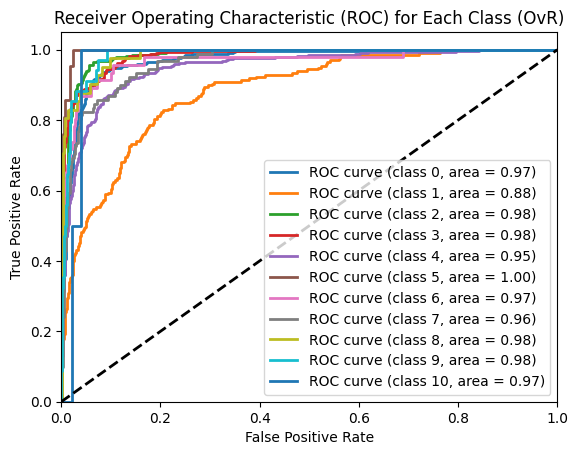


Cross-validation accuracy scores: [0.8381295  0.80275779 0.84643071 0.83383323 0.82903419]
Mean cross-validation accuracy: 0.830 ± 0.015

Logistic regression with l1 penalty: 
Accuracy: 0.8383693045563549

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       450
           1       0.70      0.57      0.63       197
           2       0.91      0.92      0.91       472
           3       0.89      0.91      0.90       316
           4       0.85      0.84      0.85       415
           5       0.62      0.86      0.72        21
           6       0.65      0.48      0.55        46
           7       0.72      0.75      0.73        91
           8       0.77      0.73      0.75        41
           9       0.67      0.53      0.59        34
          10       0.00      0.00      0.00         2

    accuracy                           0.84      2085
   macro avg       0.69      0.68      0.68      2085
weighted av

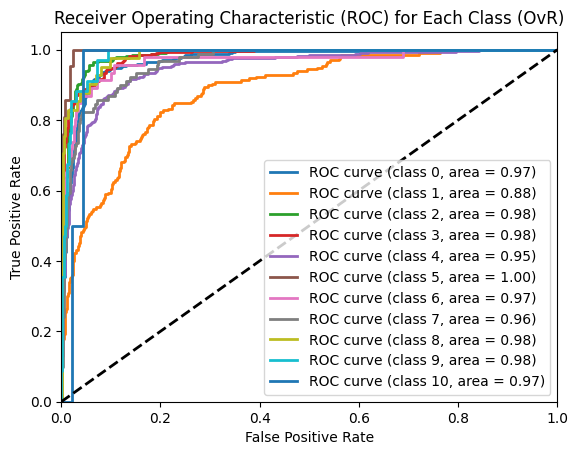

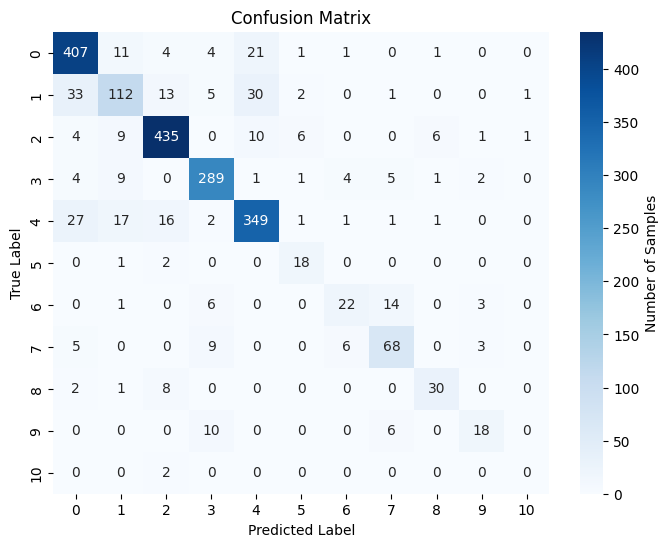


Cross-validation accuracy scores: [0.8381295  0.80215827 0.84703059 0.83503299 0.82783443]
Mean cross-validation accuracy: 0.830 ± 0.015


In [223]:
from sklearn.linear_model import LogisticRegression

# use logisticregression with l1 penalty already trained

logreg = LogisticRegression(solver='saga', max_iter=5000, C = 10, n_jobs = -1)
logreg.fit(X_train_scaled_aga, y_train_aga)

# Evaluate the models

# Logistic regression without l1 (lasso) penalty --> all 63 codons
print("Logistic regression without l1 penalty: ")
evaluate_classifier(logreg, X_train_scaled_aga, y_train_aga, X_val_scaled_aga, y_val_aga)

# Logistic regression with l1 (lass) penalty --> selected features
print("\nLogistic regression with l1 penalty: ") 
evaluate_classifier(best_logreg, X_train_scaled_aga, y_train_aga, X_val_scaled_aga, y_val_aga)

**Performance evaluation of LogisticRegression on test set (with AGA)**

In [224]:
# check test set
test_df_aga.head()

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC  \
0  5114  bct       0.00959  0.01359  0.01584  0.01312  0.02491  0.02457   
1  8747  inv       0.01223  0.03447  0.00508  0.01811  0.01176  0.02335   
2  6220  pln       0.01014  0.03014  0.00145  0.01275  0.01420  0.02521   
3  6144  pln       0.03551  0.02892  0.00155  0.01117  0.01224  0.02475   
4  6783  pln       0.01662  0.01400  0.02800  0.03412  0.01312  0.02625   

       CUA      CUG  ...      CGG      AGG      GAU      GAC      GAA  \
0  0.01885  0.01269  ...  0.00121  0.00709  0.02980  0.04135  0.02608   
1  0.00413  0.02017  ...  0.00524  0.01001  0.02621  0.03368  0.02303   
2  0.00261  0.01101  ...  0.00058  0.00174  0.02753  0.02695  0.00637   
3  0.00511  0.02233  ...  0.00451  0.00356  0.02865  0.02401  0.01594   
4  0.02100  0.01137  ...  0.00175  0.01837  0.03062  0.02362  0.03150   

       GAG      UAA      UAG      UGA       AGA  
0  0.03877  0.01183  0.00061  0.00117  0.009608  
1  0.03066  0.03479  0.00064  0.00064  0.009324  
2  0.01826  0.03216  0.00116  0.00029  0.004348  
3  0.03390  0.01628  0.00108  0.00047  0.002404  
4  0.01575  0.02625  0.00087  0.00525  0.017545  

[5 rows x 66 columns]

In [225]:
# Preprocessing of test data
X_test_aga = test_df_aga.iloc[:, 2:]
y_test_aga = pd.factorize(test_df_aga['Kingdom'])[0]

# Select only the features chosen by LogisticRegression (penalty l1) from the test set 
X_test_selected_aga = X_test_aga[selected_features]  

# Standardize test data using the scaler fitted on the training data
X_test_selected_scaled_aga = scaler_aga.transform(X_test_selected_aga) # Use the scaled version of X_test_selected

print(f"Number of selected features: {len(X_test_selected_aga.columns)}")
print(f"Selected features: {X_test_selected_aga.columns}")

Number of selected features: 45
Selected features: Index(['UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUG', 'AUU', 'AUC', 'AUG',
       'GUU', 'GUC', 'GUA', 'GUG', 'GCC', 'GCA', 'GCG', 'CCC', 'CCA', 'UGG',
       'GGU', 'GGC', 'GGA', 'UCA', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG',
       'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'UGU', 'UGC', 'CAC', 'AAA', 'AGG',
       'GAA', 'GAG', 'UAA', 'UGA', 'AGA'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [229]:
# Evaluate best LogisticRegression on test data
best_logreg.fit(X_test_selected_scaled_aga, y_test_aga)
evaluate_test_classifier(best_logreg, X_test_selected_scaled_aga, y_test_aga)

Accuracy on the test set: 0.8514965464313123

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       584
           1       0.75      0.61      0.67       269
           2       0.80      0.81      0.81       505
           3       0.87      0.92      0.90       567
           4       0.83      0.74      0.78       114
           5       1.00      0.88      0.94        25
           6       0.83      0.68      0.75        44
           7       0.88      0.92      0.90       415
           8       0.71      0.67      0.69        43
           9       0.83      0.69      0.76        36
          10       1.00      0.50      0.67         4

    accuracy                           0.85      2606
   macro avg       0.86      0.76      0.80      2606
weighted avg       0.85      0.85      0.85      2606



# **CONCLUSIONS**

After regressing on AGA, we could see that the classification accuracy did not change, meaning that AGA codon usage is probably not a significant predictor for the classification of organisms into different biological Kingdoms.